In [1]:

## data manupulation
import numpy as np
import pandas as pd

## label encoder
from sklearn.preprocessing import LabelEncoder

## for plotting
import matplotlib.pyplot as plt



###### plotting confiduration dont focus on that its just a  configuration
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})

In [2]:

## read the data
df = pd.read_csv('../input/data.csv')

In [3]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [4]:

## init the encoder
encoder = LabelEncoder()

In [6]:
#3 encode the target
target=encoder.fit_transform(df['class'])


In [7]:
## assign the encoded target toa  new column
df['num_class'] = np.array(target)


In [8]:
## we need 1 vs 1 multioutput classification
## package for multioutput classifier
from sklearn.multioutput import MultiOutputClassifier


In [9]:
## we deine the whole encoding a function to do it easily with other column
def encode(df):
    encoder = LabelEncoder()
    target=encoder.fit_transform(df)
    return np.array(target)

In [10]:
## encode the protocol
num_proto = encode(df['protocol_type'])

In [13]:
## save with a another name 
df['num_proto']  = num_proto
service_num = encode(df['service'])
df['service_num'] = service_num
flag_num = encode(df['flag'])
df['flag_num'] = flag_num

In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,num_class,num_proto,service_num,flag_num
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.0,0.0,1.00,1.00,anomaly,0,1,45,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.0,0.0,1.00,1.00,anomaly,0,1,45,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.02,0.0,0.0,0.00,0.00,normal,1,1,19,9
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.28,0.0,0.0,0.00,0.00,anomaly,0,0,13,9
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.02,0.0,0.0,0.83,0.71,anomaly,0,1,55,2


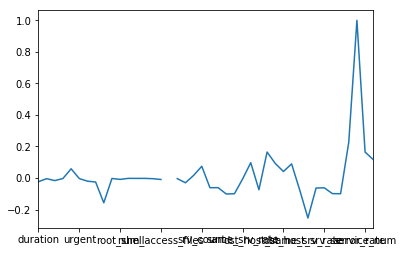

In [15]:
df.corr()['num_proto'].plot()


In [16]:
df_working = df[['duration','dst_bytes','wrong_fragment','num_failed_logins','logged_in','num_compromised','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_guest_login','srv_count','same_srv_rate','srv_diff_host_rate','dst_host_same_srv_rate','num_proto','flag_num','num_class']]

In [19]:
## working dataset .the data set we work with
df_working.head()

,duration,dst_bytes,wrong_fragment,num_failed_logins,logged_in,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,srv_count,same_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,num_proto,flag_num,num_class
0,0,0,0,0,0,0,0,0,0,0,0,0,10,0.04,0.00,0.04,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.01,0.00,0.00,1,1,0
2,2,0,0,0,0,0,0,0,0,0,0,0,1,1.00,0.00,0.61,1,9,1
3,0,0,0,0,0,0,0,0,0,0,0,0,65,1.00,1.00,1.00,0,9,0
4,1,15,0,0,0,0,0,0,0,0,0,0,8,1.00,0.75,0.31,1,2,0


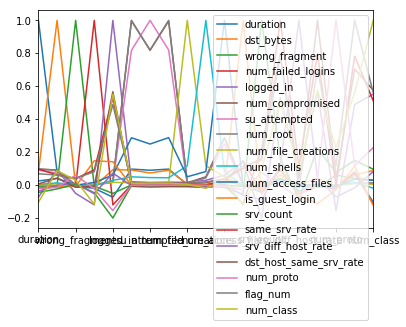

In [20]:
df_working.corr().plot()

In [21]:
df_working.corr()['num_class']

duration                 -0.106201
dst_bytes                 0.086466
wrong_fragment            0.027739
num_failed_logins        -0.118709
logged_in                 0.551159
num_compromised           0.008301
su_attempted              0.010274
num_root                  0.009652
num_file_creations        0.002798
num_shells               -0.020895
num_access_files          0.027126
is_guest_login           -0.125100
srv_count                 0.094713
same_srv_rate             0.510634
srv_diff_host_rate        0.080156
dst_host_same_srv_rate    0.575526
num_proto                 0.226362
flag_num                  0.560327
num_class                 1.000000
Name: num_class, dtype: float64

In [36]:

##dropping my two target
X = df_working.drop(['num_class'], axis=1)
X = X.drop(['num_proto'], axis=1)


## y1 is our main target
y1 = df_working[['num_class','num_proto']]

# this is a single target for plotting putpose
y2 = df_working[['num_class']]


## two working label in necessayy because we want to find the first best param | independently
## why we take another one i mean y2 cause we cant do grid on basis of both er have to choose 1 for grid


In [37]:
X.head()

,duration,dst_bytes,wrong_fragment,num_failed_logins,logged_in,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,srv_count,same_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,flag_num
0,0,0,0,0,0,0,0,0,0,0,0,0,10,0.04,0.00,0.04,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.01,0.00,0.00,1
2,2,0,0,0,0,0,0,0,0,0,0,0,1,1.00,0.00,0.61,9
3,0,0,0,0,0,0,0,0,0,0,0,0,65,1.00,1.00,1.00,9
4,1,15,0,0,0,0,0,0,0,0,0,0,8,1.00,0.75,0.31,2


In [38]:
y1.head() ## two target at once 

,num_class,num_proto
0,0,1
1,0,1
2,1,1
3,0,0
4,0,1


In [39]:
y2.head()  ## single first target

,num_class
0,0
1,0
2,1
3,0
4,0


In [40]:
##

,num_proto
0,1
1,1
2,1
3,0
4,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold

In [42]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y1,test_size=.2)  ## for both
x_train,x_test,y_train,y_test = train_test_split(X,y2,test_size=.2)    ## for finding grid


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Best upon 1 we predict the next one we cant do grid both all at once cause .each require different parameter set  and we are doing one vs one prediction

In [44]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10,n_jobs=-1,verbose=2 ,scoring = 'accuracy')
grid.fit(x_train,y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.2min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [45]:
## for plotting the grid here not the result .and its not part of the main thesis just plotting the grid behaviour
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel('Accuracy')
    ax.legend(title=param_z)
    return fig

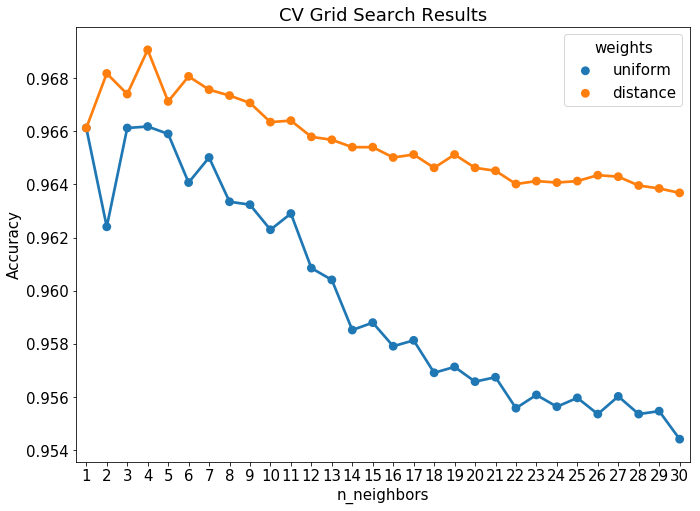

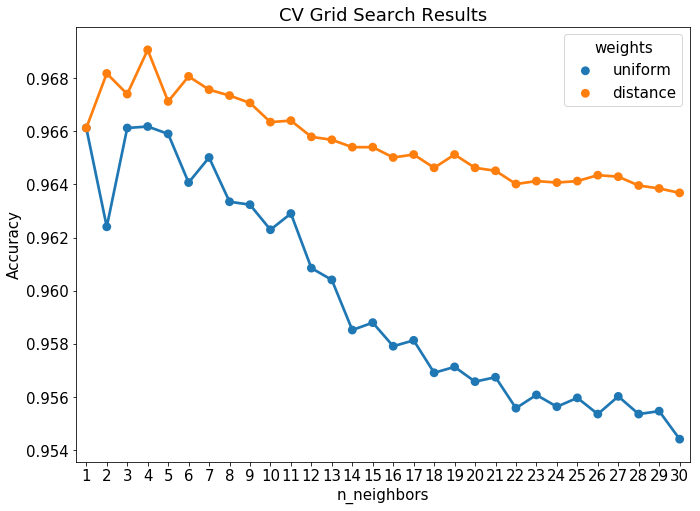

In [46]:
plt.rcParams.update({'font.size': 15})  ## plotting configuration

## plotting grid behaviour
plot_cv_results(grid.cv_results_, 'n_neighbors', 'weights')

In [47]:
## jupyter can render without show command thats why two pic

In [ ]:
## plotting with respect to whole

In [51]:
from sklearn.metrics import confusion_matrix
knn_final = grid.best_estimator_  ## find the best estimator
tmp_pred_knn = knn_final.fit(x_train,y_train)  ## individual training for individual confusion matrix precision,recall,F1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
import seaborn as sns
pr1 = tmp_pred_knn.predict(x_test)

confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)

from sklearn.metrics import precision_score,recall_score,f1_score
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

[[2511   81]
 [  76 1841]]
Precision score 0.9578563995837669
Recall score 0.9603547209181011
F1 score 0.9591039333159678


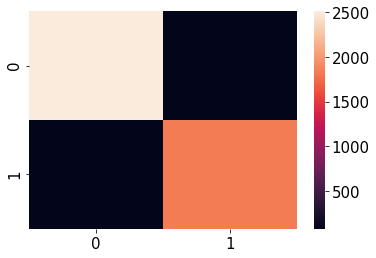

In [53]:
sns.heatmap(confusion_matrix1)

In [54]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) ## njobs force the computer to use all their resources

In [55]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 23.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[2537   55]
 [  52 1865]]
Precision score 0.9713541666666666
Recall score 0.9728742827334377
F1 score 0.9721136304404483


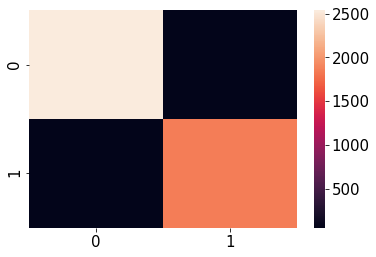

In [57]:
rf_final=grid_search.best_estimator_   # find the best estimator
tmp_pred_rf = rf_final.fit(x_train,y_train)       ## individual training 
pr1 = tmp_pred_rf.predict(x_test)   #3individual prediction
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

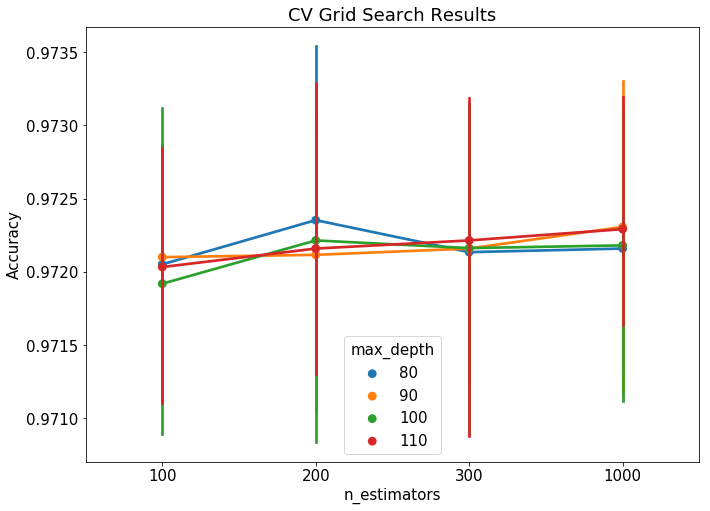

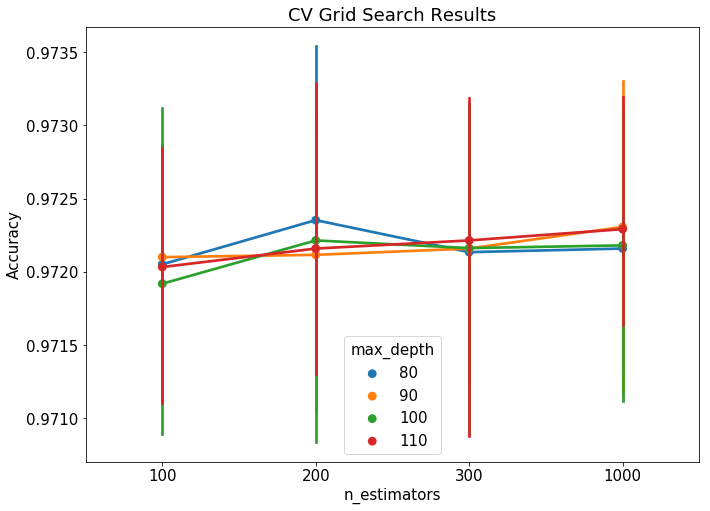

In [58]:
plot_cv_results(grid_search.cv_results_, 'n_estimators', 'max_depth')
#param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

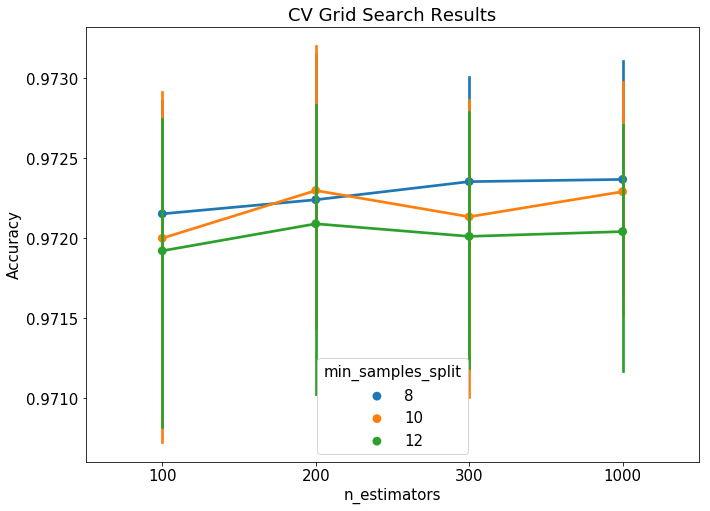

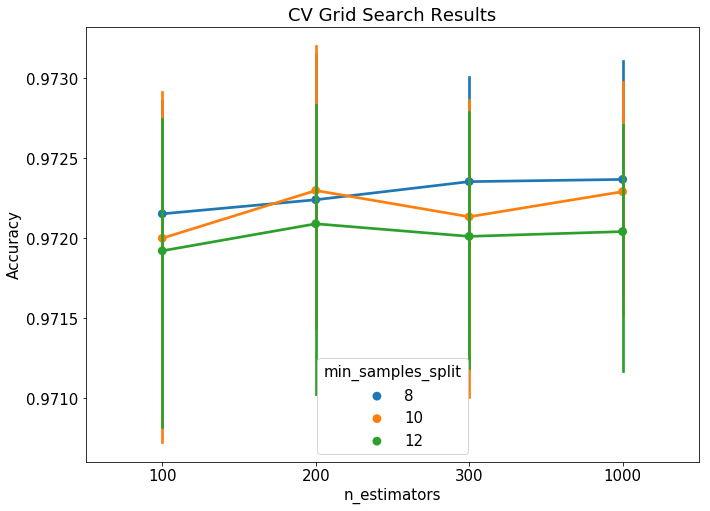

In [59]:
plot_cv_results(grid_search.cv_results_, 'n_estimators', 'min_samples_split')
#grid2 = GridSearchCV(SVC(),param_grid,n_jobs=-1,refit = True, verbose=2)

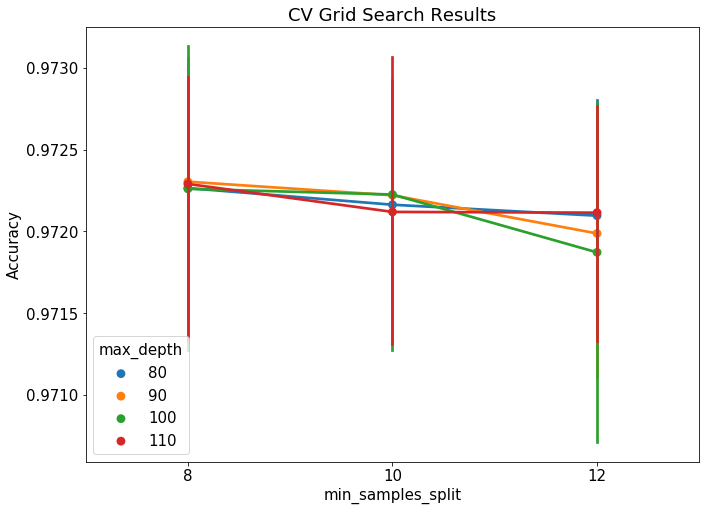

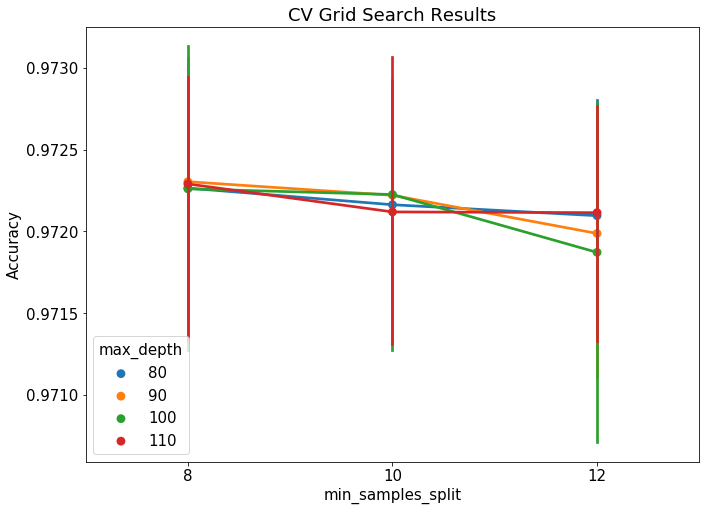

In [60]:
plot_cv_results(grid_search.cv_results_,'min_samples_split','max_depth')
#grid2.fit(x_train,y_train)

In [61]:
#svc_final = grid2.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[2479  113]
 [  61 1856]]
Precision score 0.9426104621635348
Recall score 0.9681794470526864
F1 score 0.9552238805970149


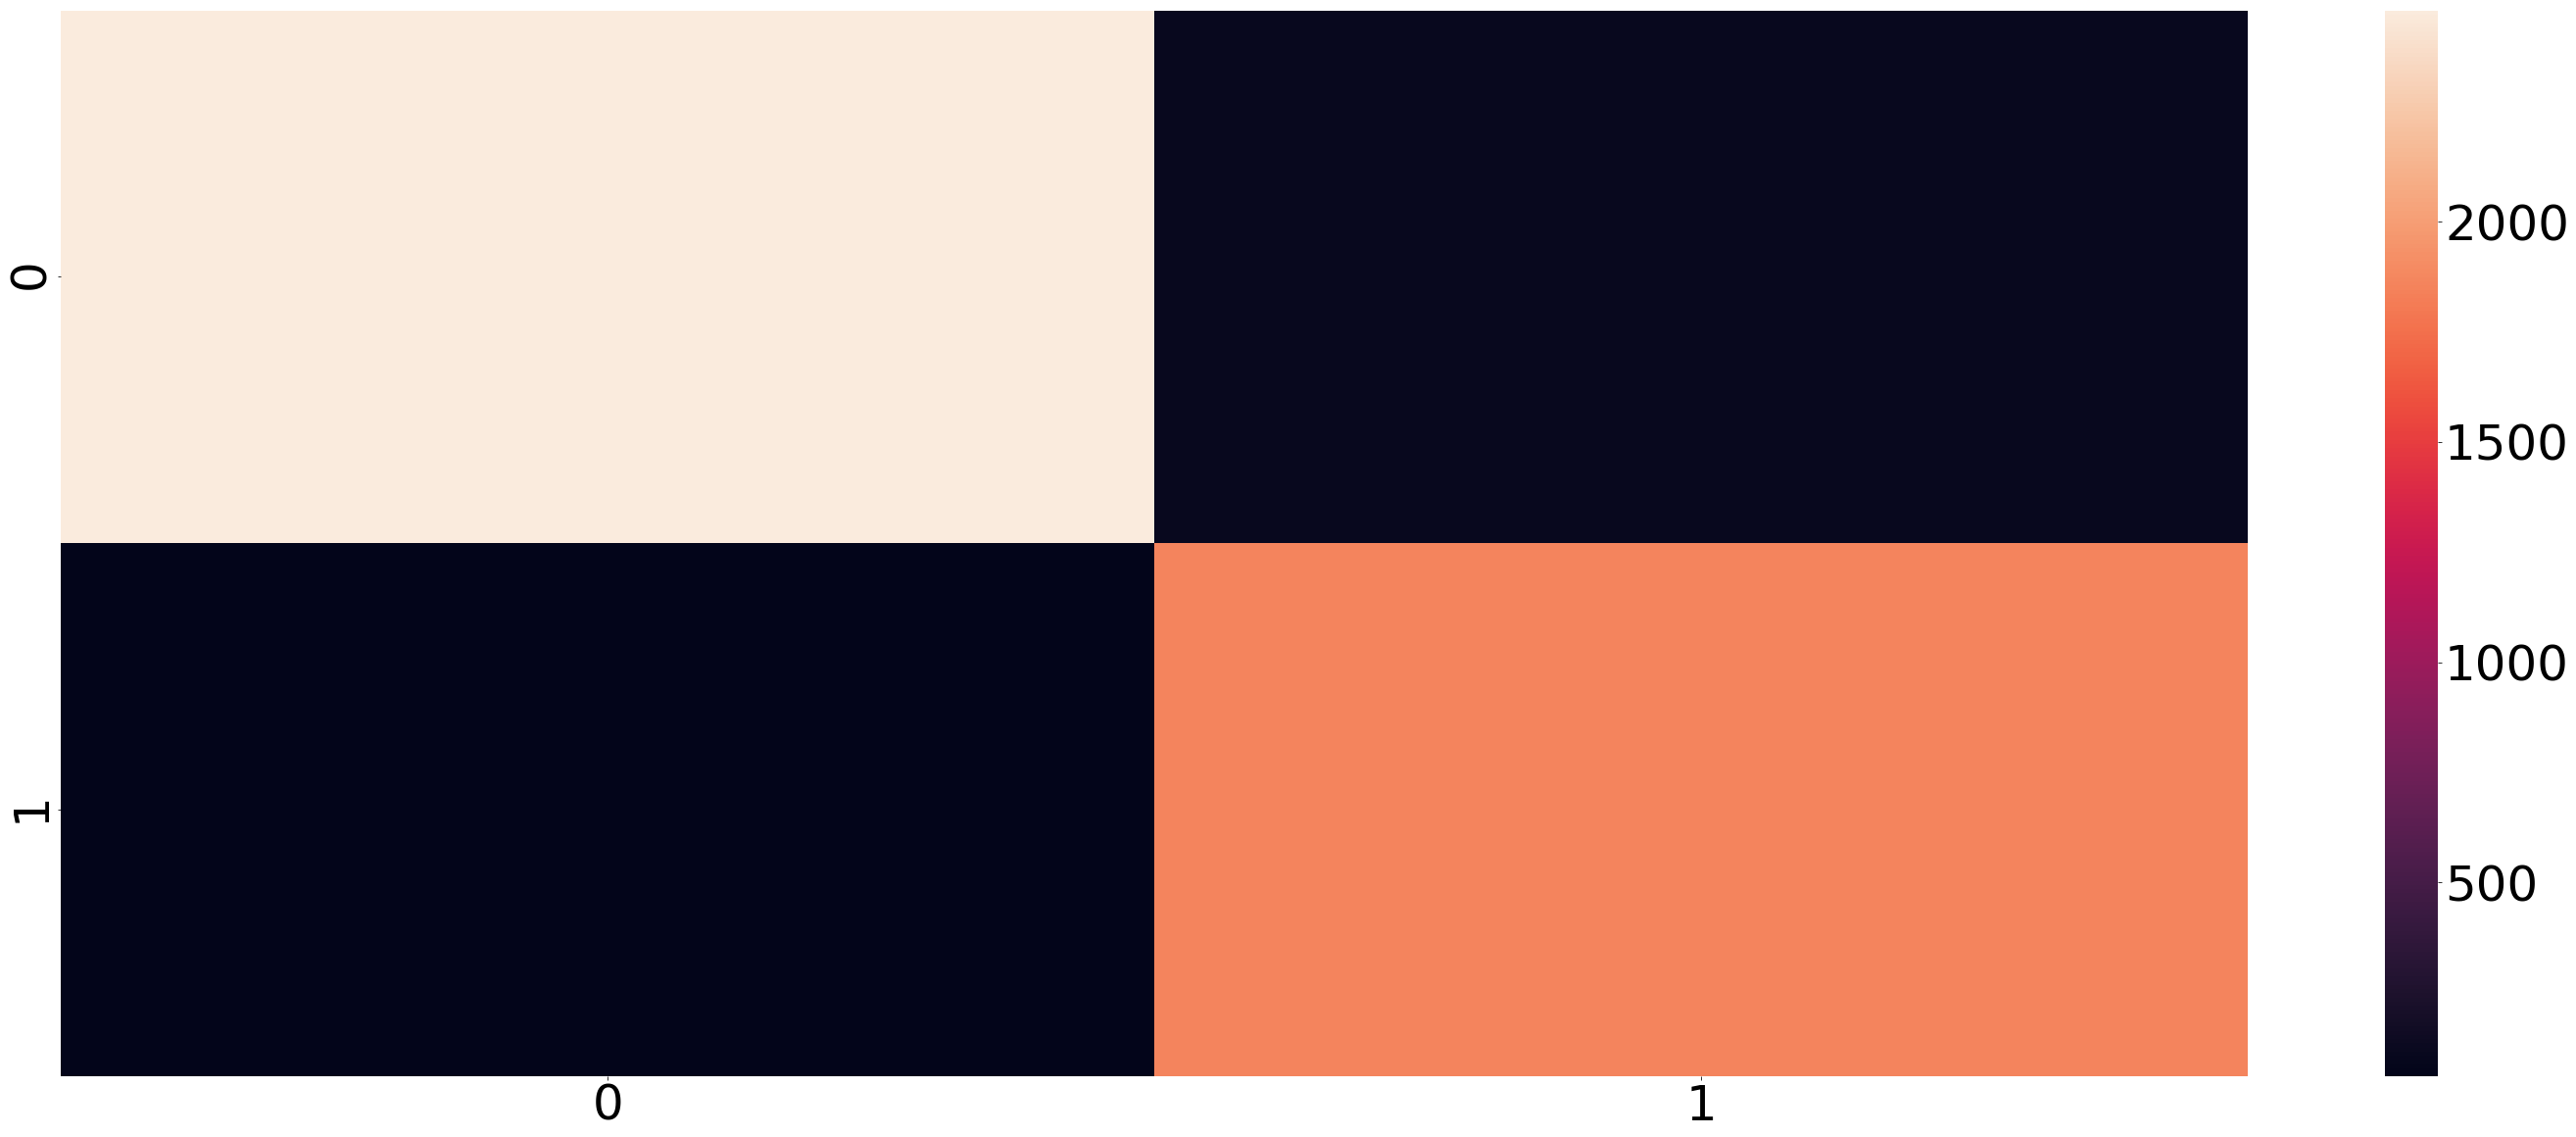

In [63]:
svc_final = SVC()
svc_final.fit(x_train,y_train)
pr1 = svc_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)

plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

In [64]:
param_grid = {'C':[1,10,100,1000]}
grid3 = GridSearchCV(LinearSVC(),param_grid,refit = True, verbose=2,n_jobs=-1)


In [65]:
grid3.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [66]:
## for plotting we can take all the parameter into accountso we take the most important for plotting separately
ACP=[]
#plot_cv_results(grid3.cv_results_,'C',)
C = range(1,100)
for item in C:
    model = LinearSVC(C=item)
    model.fit(x_train,y_train)
    ACP.append(model.score(x_test,y_test))
    

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataCo

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWar

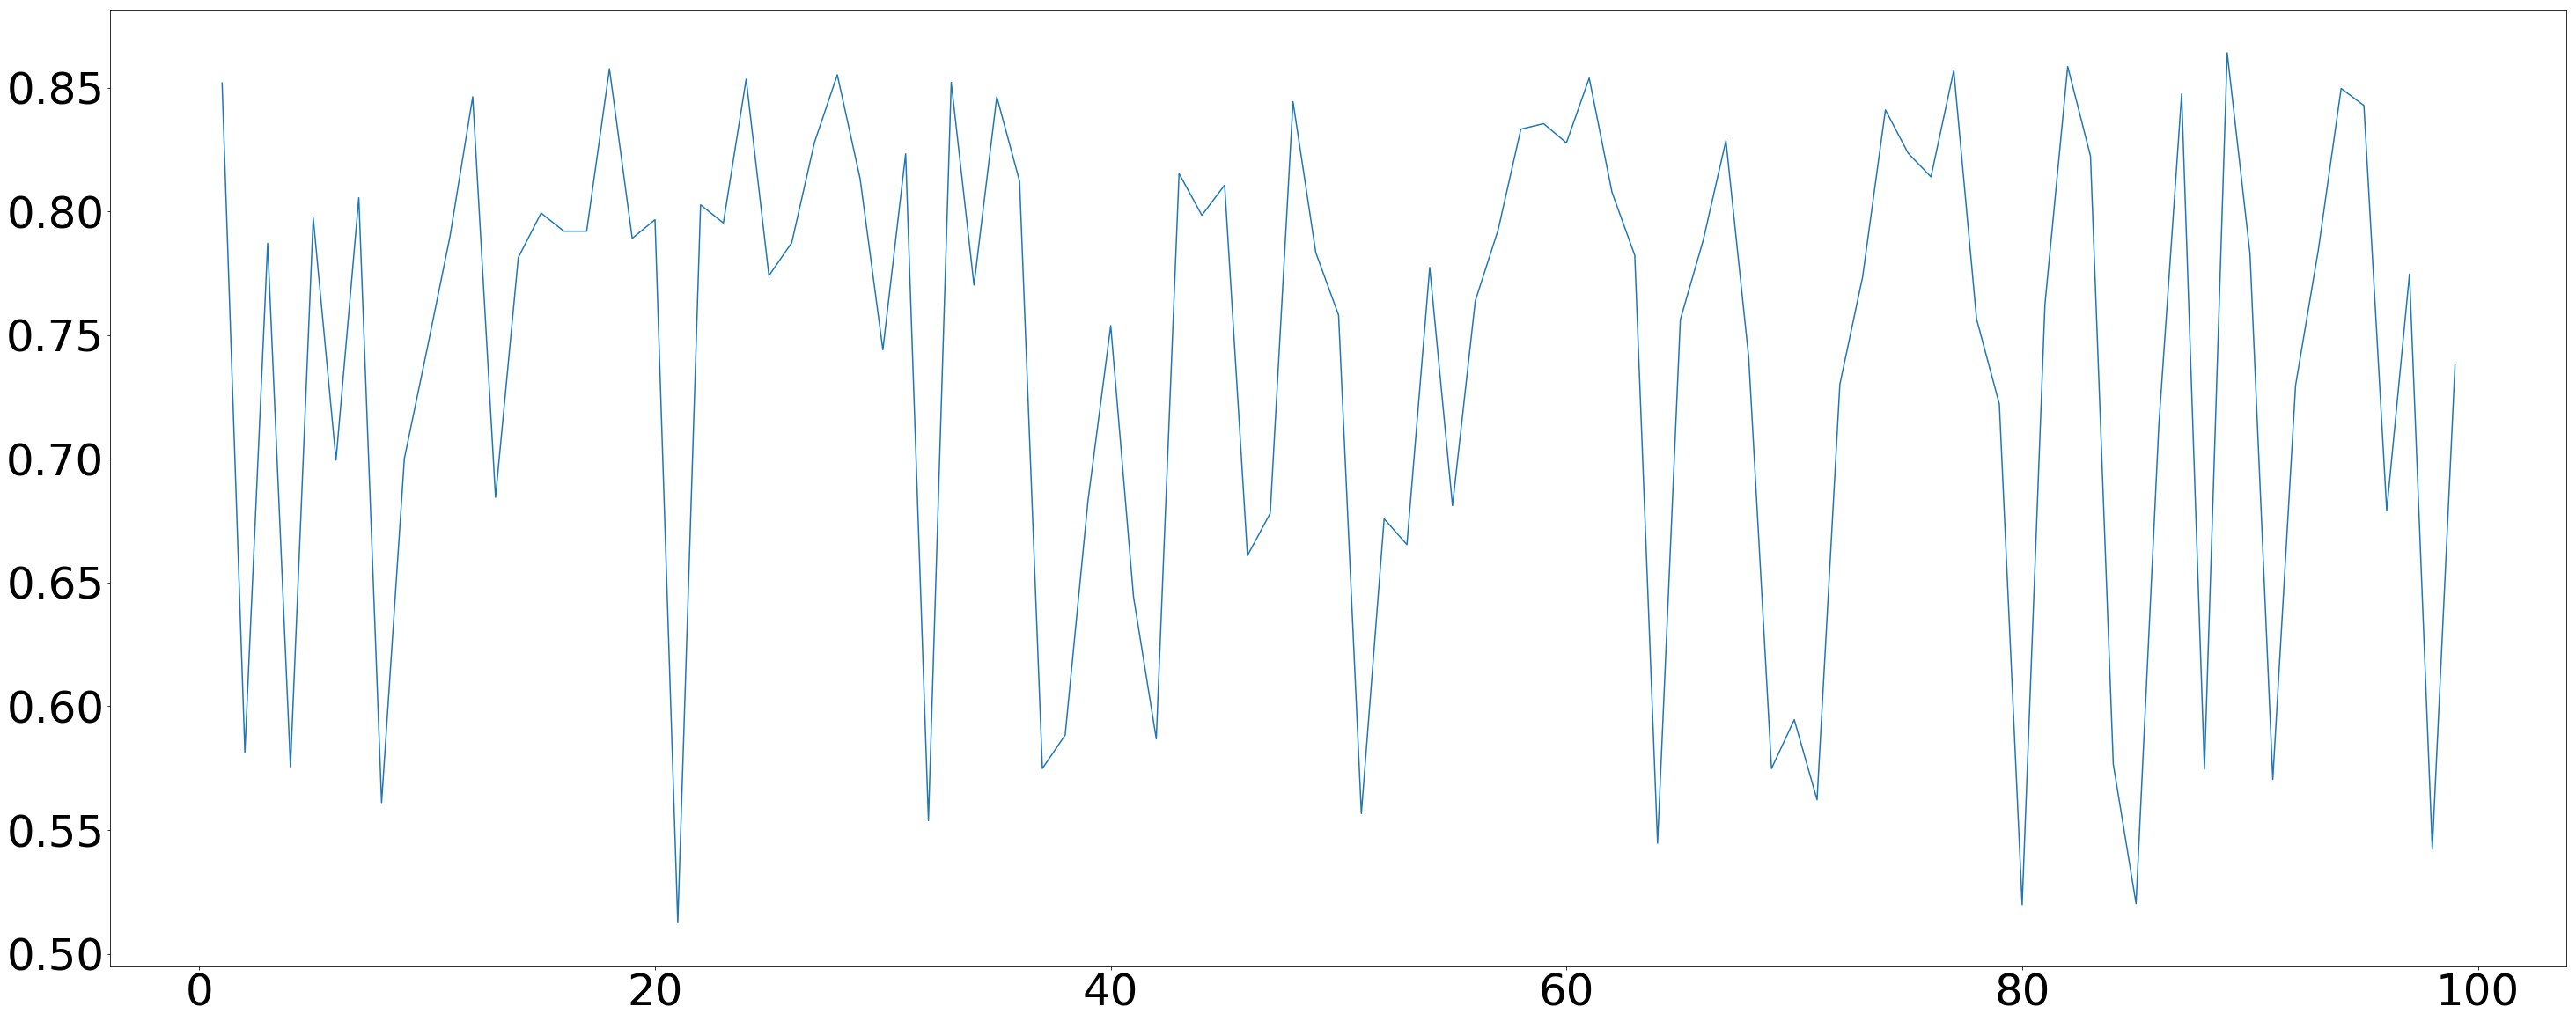

In [67]:
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 50})
plt.plot(C,ACP)

In [68]:
print (ACP)

[0.8518518518518519, 0.5815036593479708, 0.7870924817032602, 0.5755156353958749, 0.7972943002883123, 0.6994899090707474, 0.8055001108893325, 0.5611000221778665, 0.7001552450654247, 0.7445109780439122, 0.7897538256819694, 0.846307385229541, 0.6844089598580616, 0.7813262364160568, 0.7992903082723442, 0.7919716123308937, 0.7919716123308937, 0.8576180971390552, 0.7890884896872921, 0.796628964293635, 0.5125304945664227, 0.8026169882457308, 0.7952982923042803, 0.8534043025060989, 0.7740075404746063, 0.7873142603681526, 0.8278997560434687, 0.8551785318252384, 0.8132623641605677, 0.7440674207141273, 0.8232424040807275, 0.5537813262364161, 0.8520736305167443, 0.7702373031714349, 0.846307385229541, 0.8121534708361056, 0.5748502994011976, 0.5883787979596363, 0.6828565092038146, 0.7538256819693946, 0.6442670215125305, 0.5868263473053892, 0.8152583721445997, 0.7984031936127745, 0.8106010201818585, 0.6609004213794633, 0.677977378576181, 0.844311377245509, 0.7833222444000887, 0.7580394766023508, 0.55

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[1684  908]
 [  77 1840]]
Precision score 0.6695778748180495
Recall score 0.9598330725091289
F1 score 0.7888531618435156


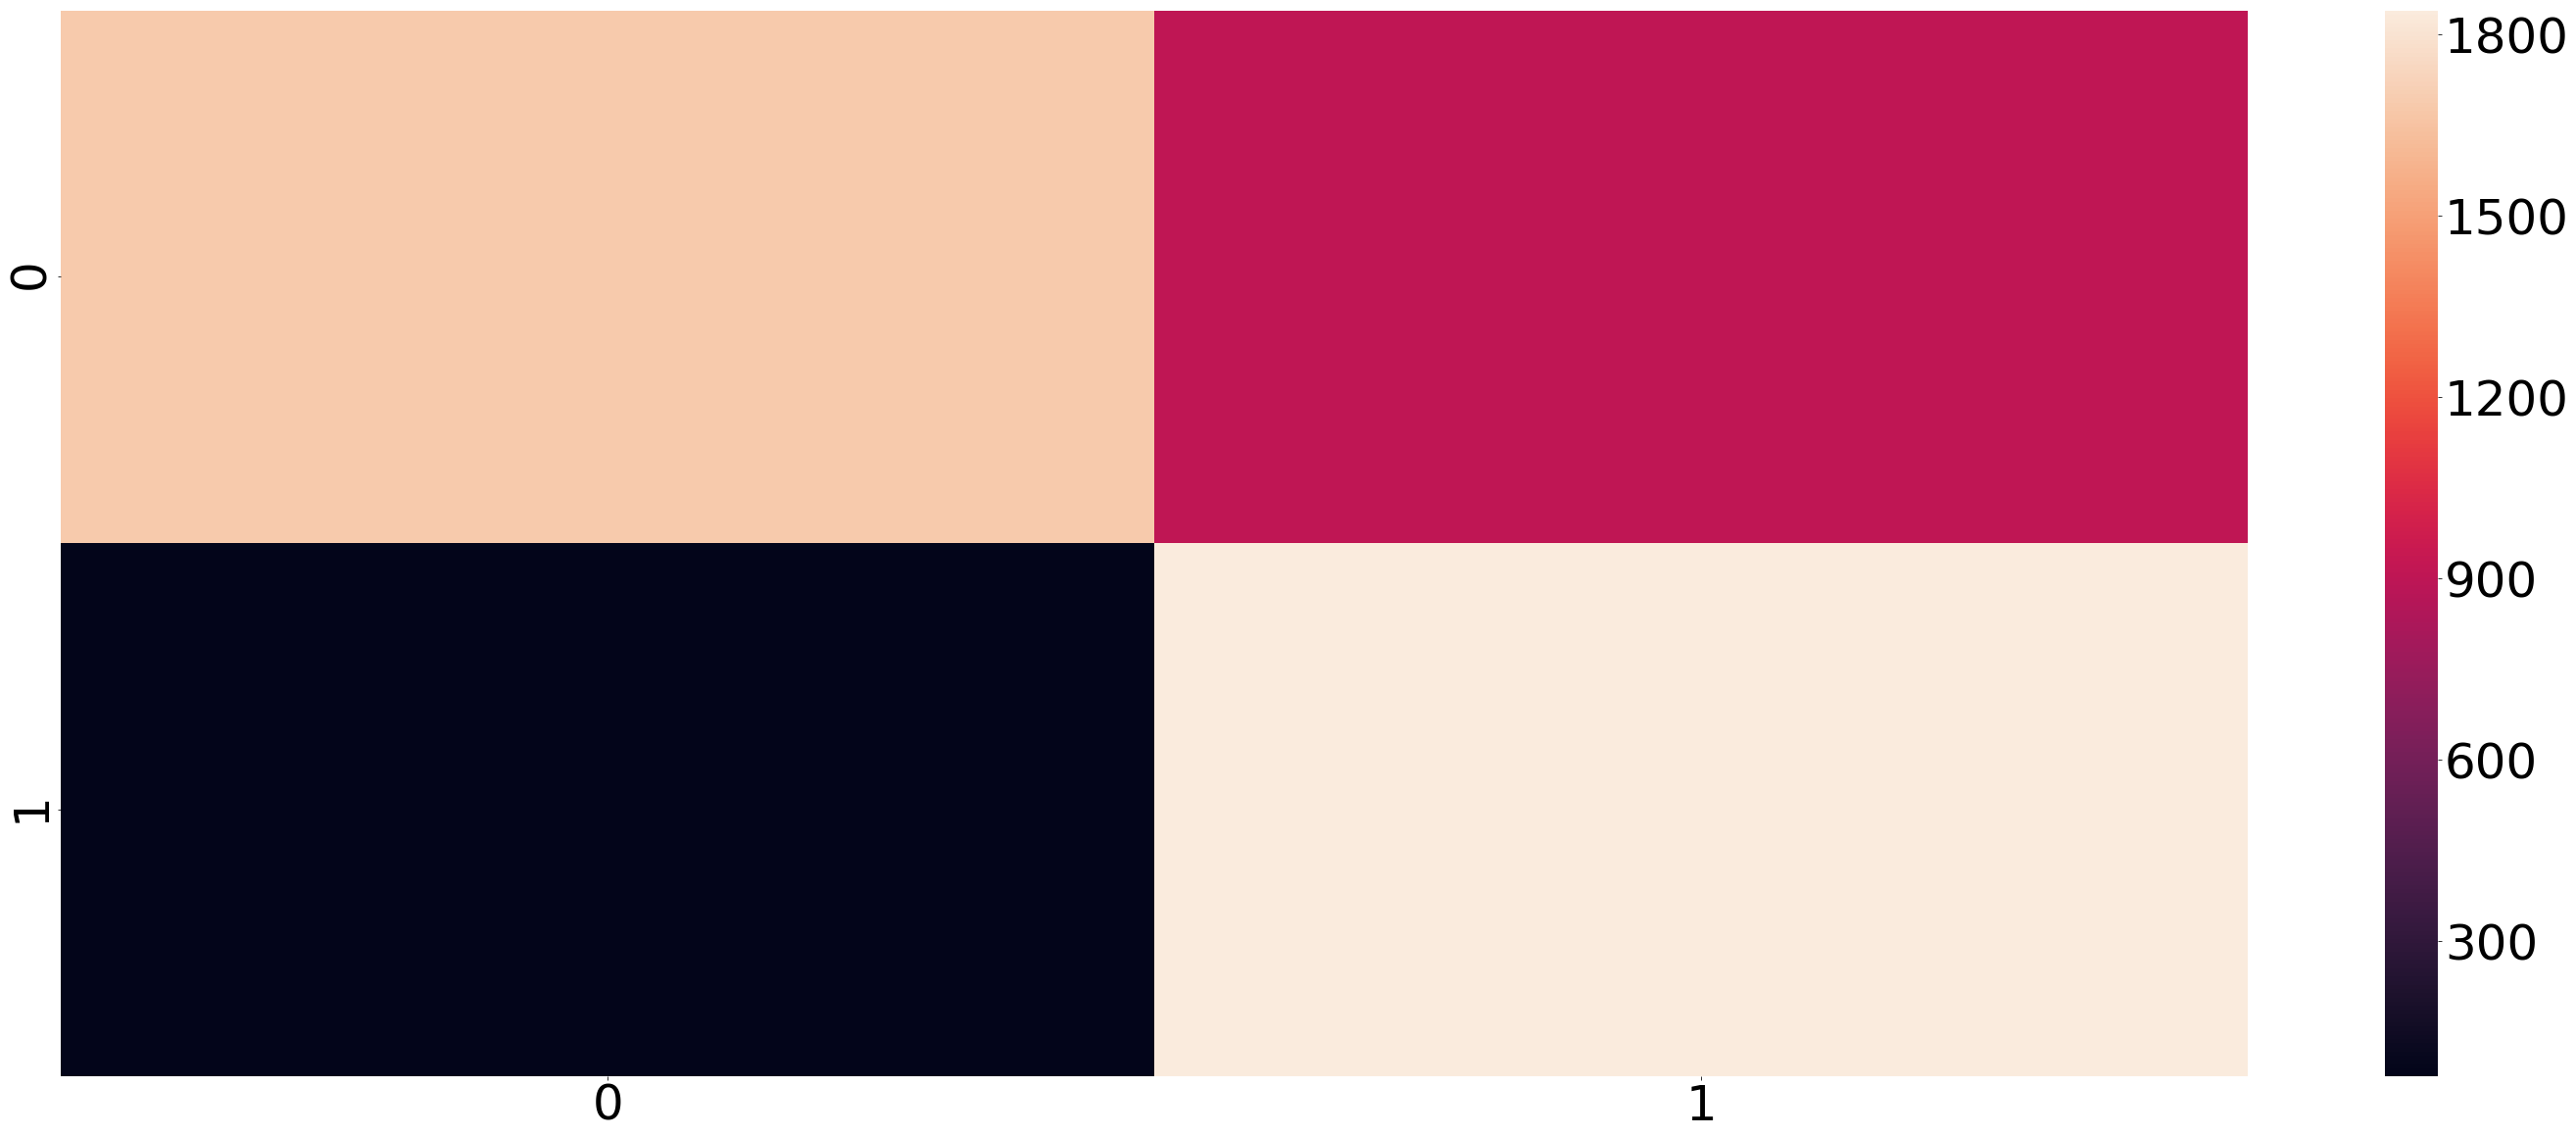

In [69]:
lsvc_final = grid3.best_estimator_

lsvc_final.fit(x_train,y_train)
pr1 = lsvc_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

In [70]:
parameters = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }

grid4 = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=2, cv=10, n_jobs=-1)

grid4.fit(x_train, y_train)
print (grid4.best_estimator_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.4min finished
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2531   61]
 [  51 1866]]
Precision score 0.9683445770627919
Recall score 0.97339593114241
F1 score 0.9708636836628513


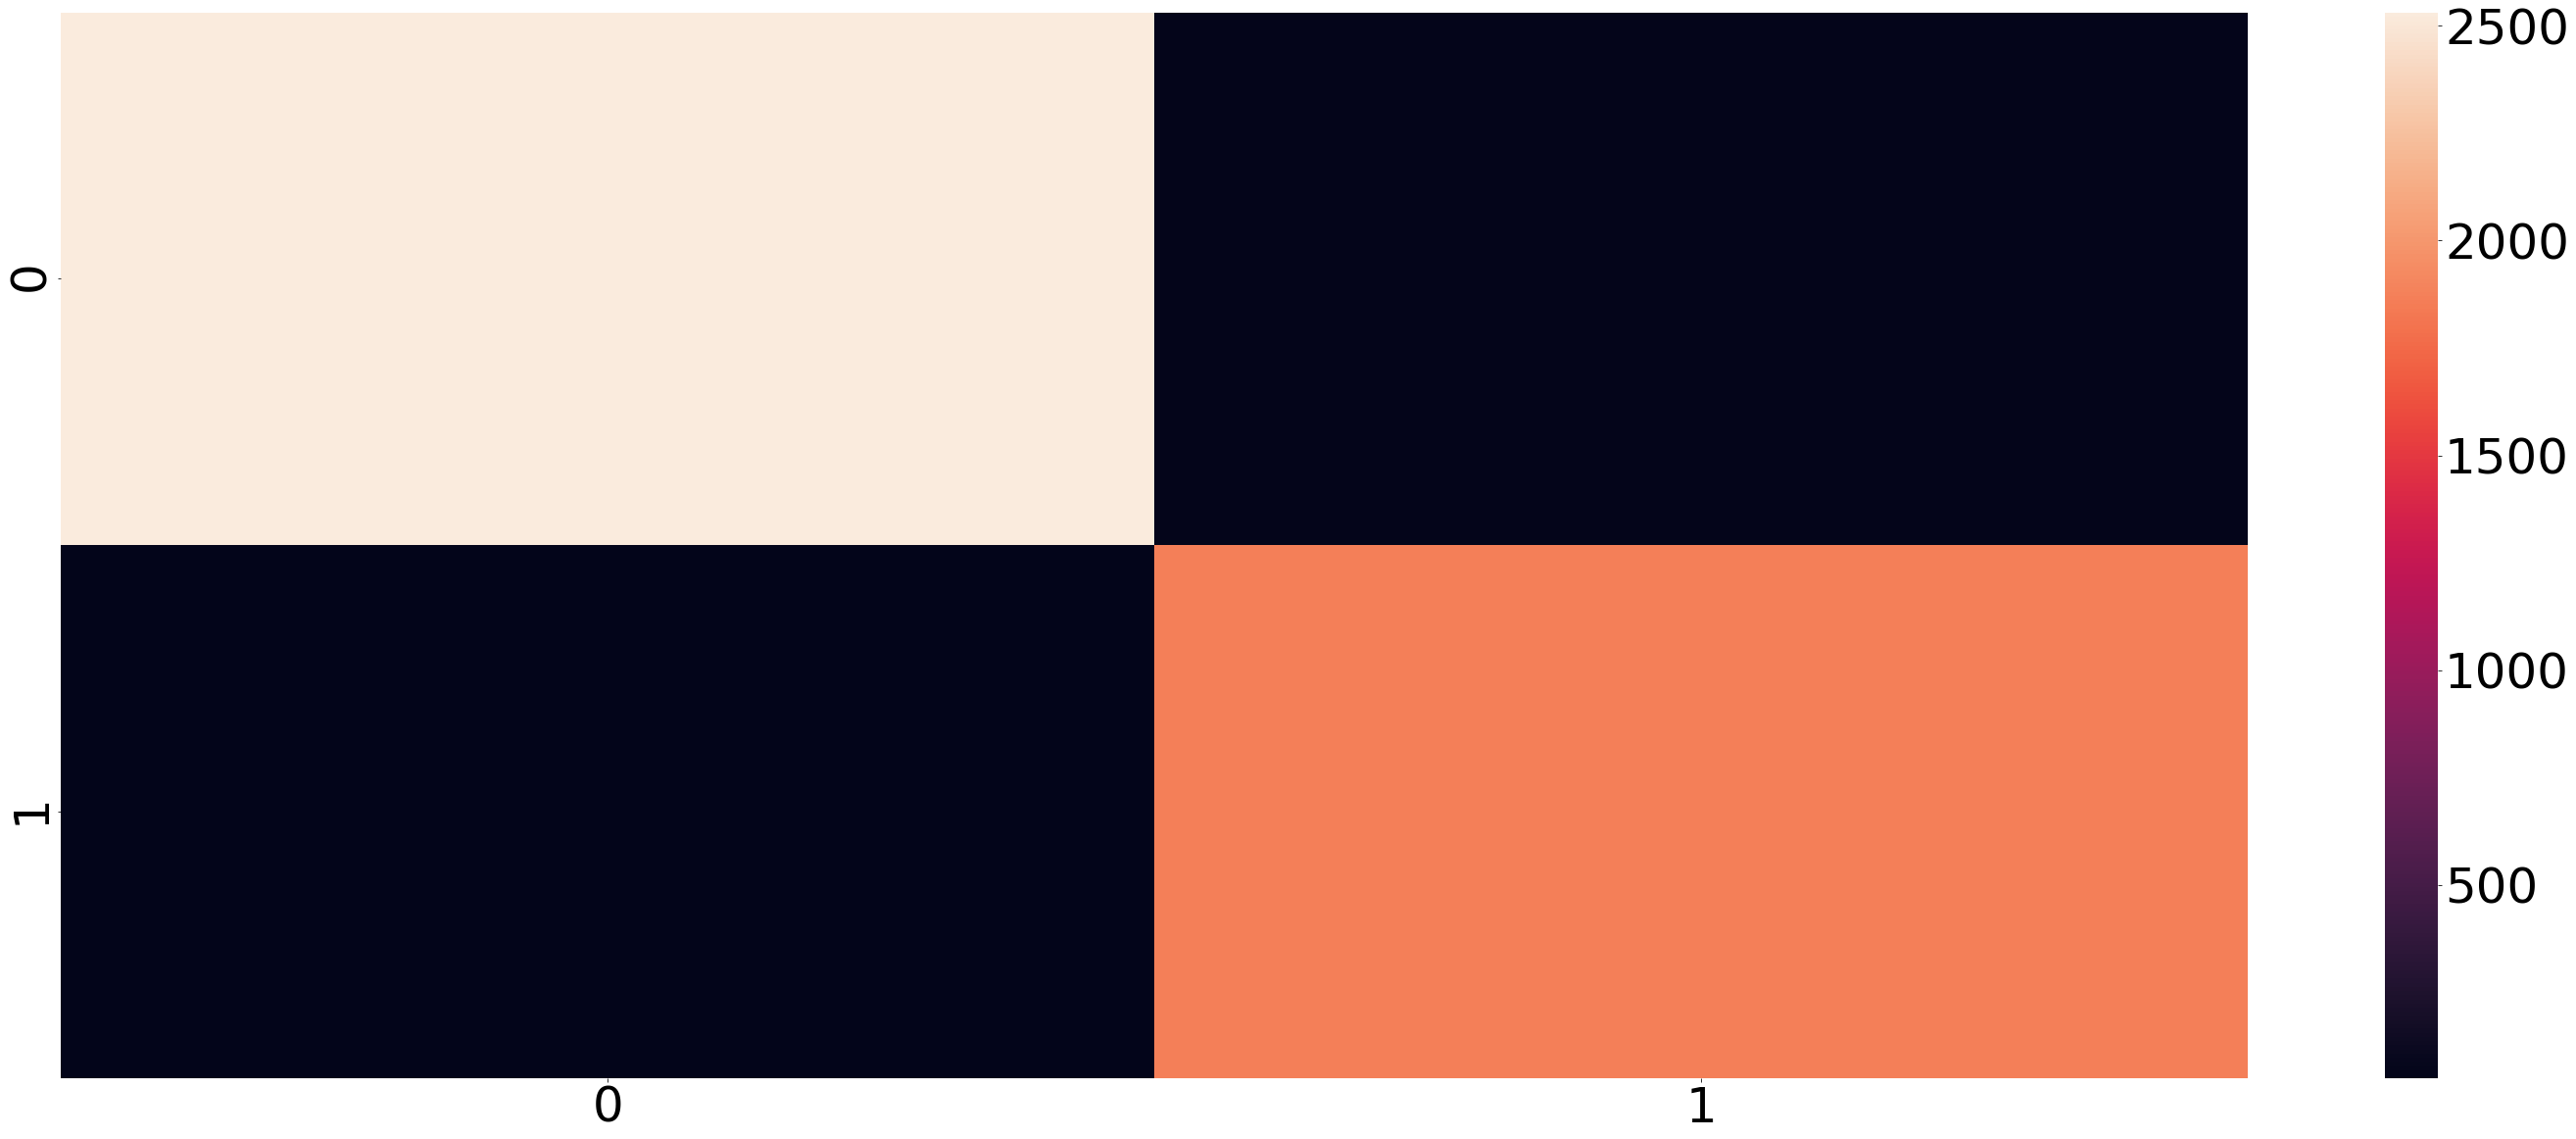

In [72]:
gb_final = grid4.best_estimator_

gb_final.fit(x_train,y_train)
pr1 = gb_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))
sns.heatmap(confusion_matrix1)

In [73]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP1=[]

## plotting based on the most imp charactisitcs learning_rate
for item in learning_rate1:
    model1 = GradientBoostingClassifier(learning_rate=item)
    model1.fit(x_train,y_train)
    ACP1.append(model1.score(x_test,y_test))
    print(item)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.05


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.02


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01


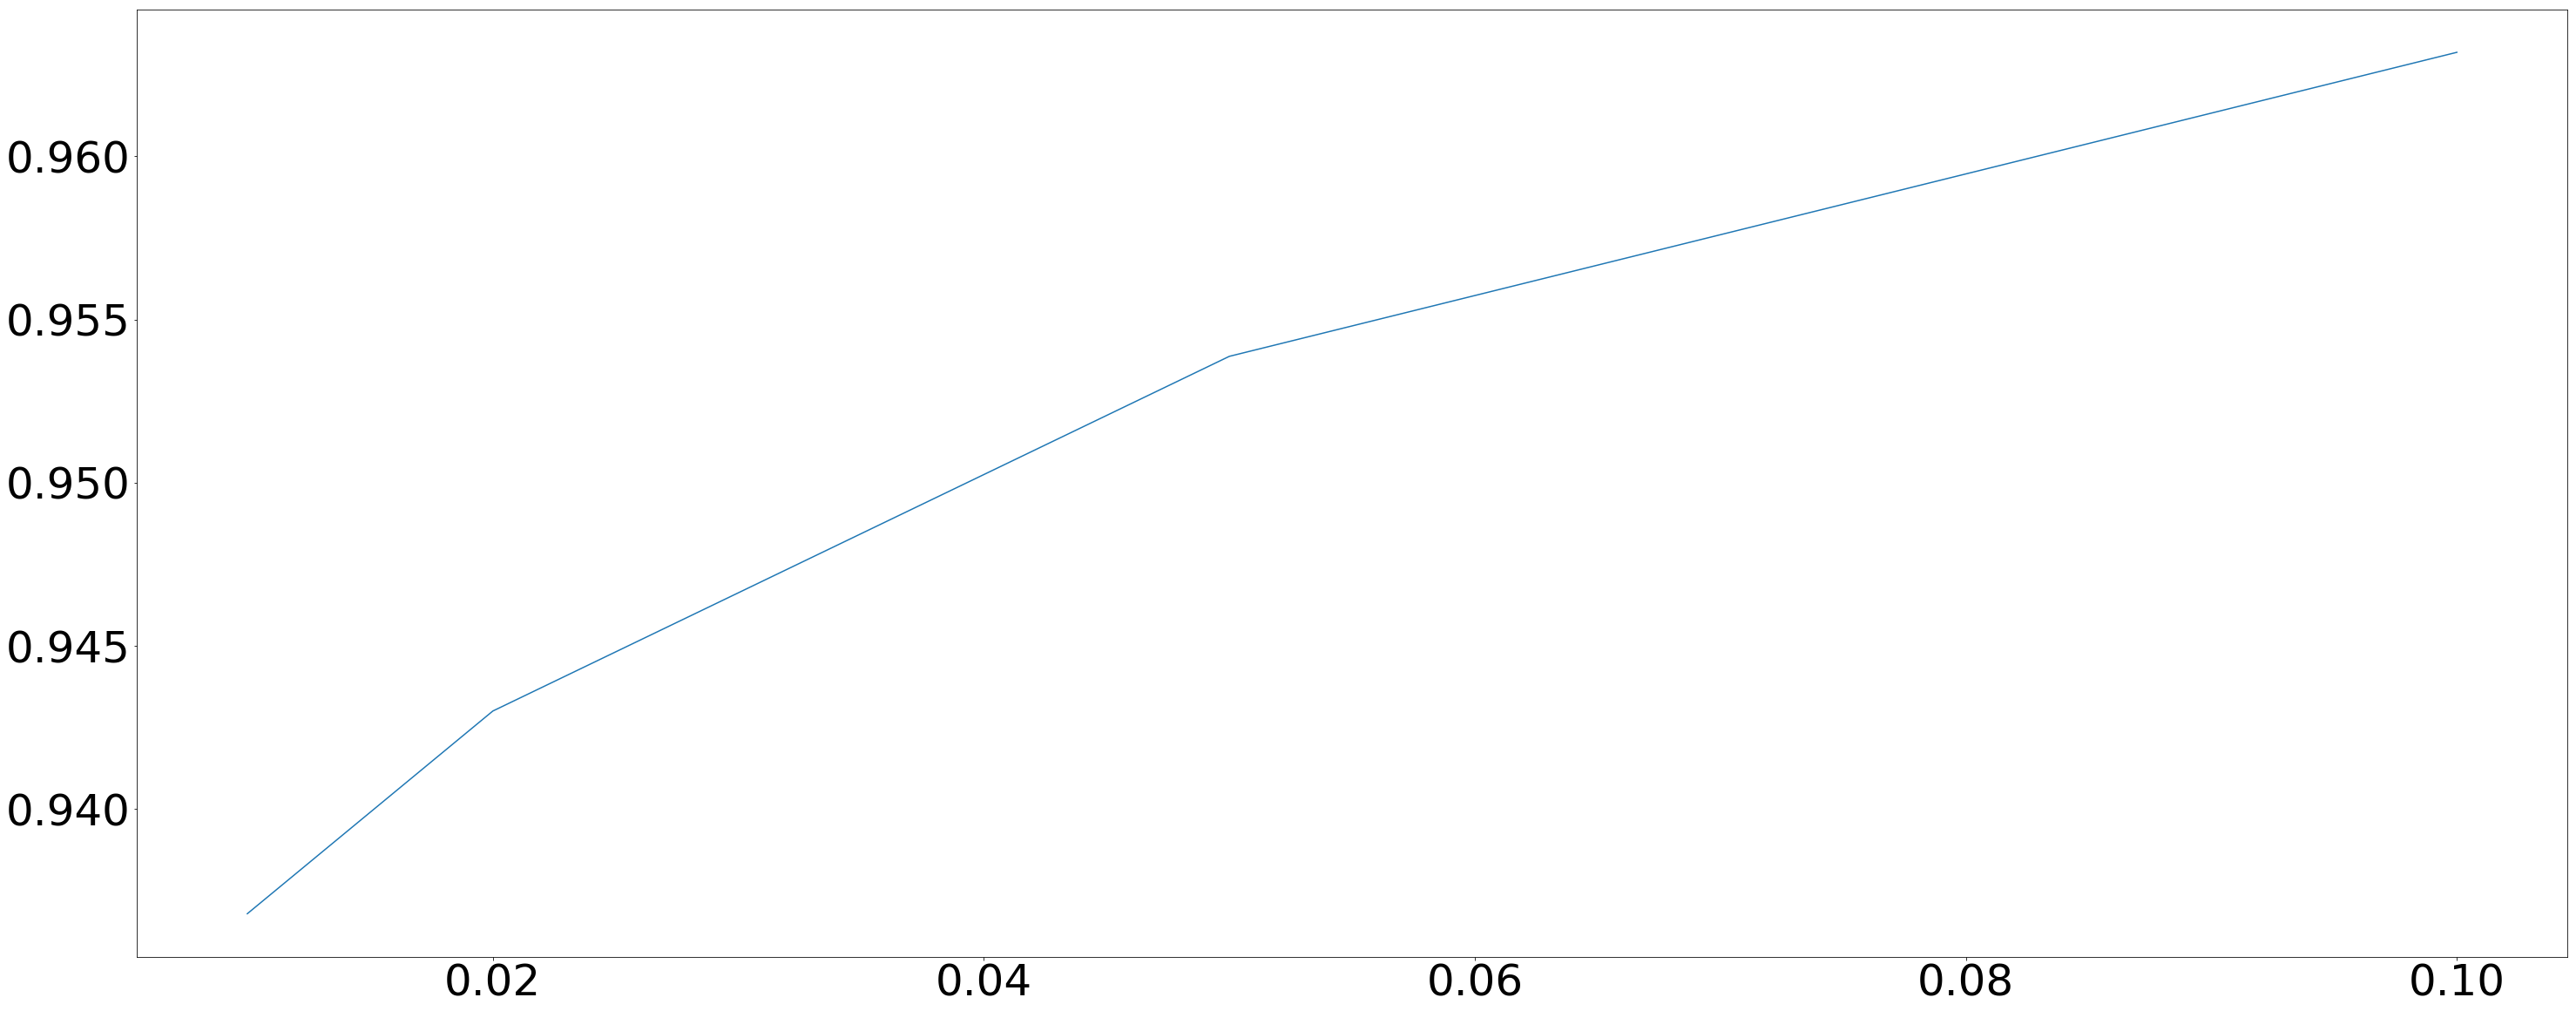

In [74]:
plt.plot(learning_rate1,ACP1)

In [75]:
ACP1

[0.9631847416278554, 0.953870037702373, 0.9430028831226436, 0.9367930805056554]

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


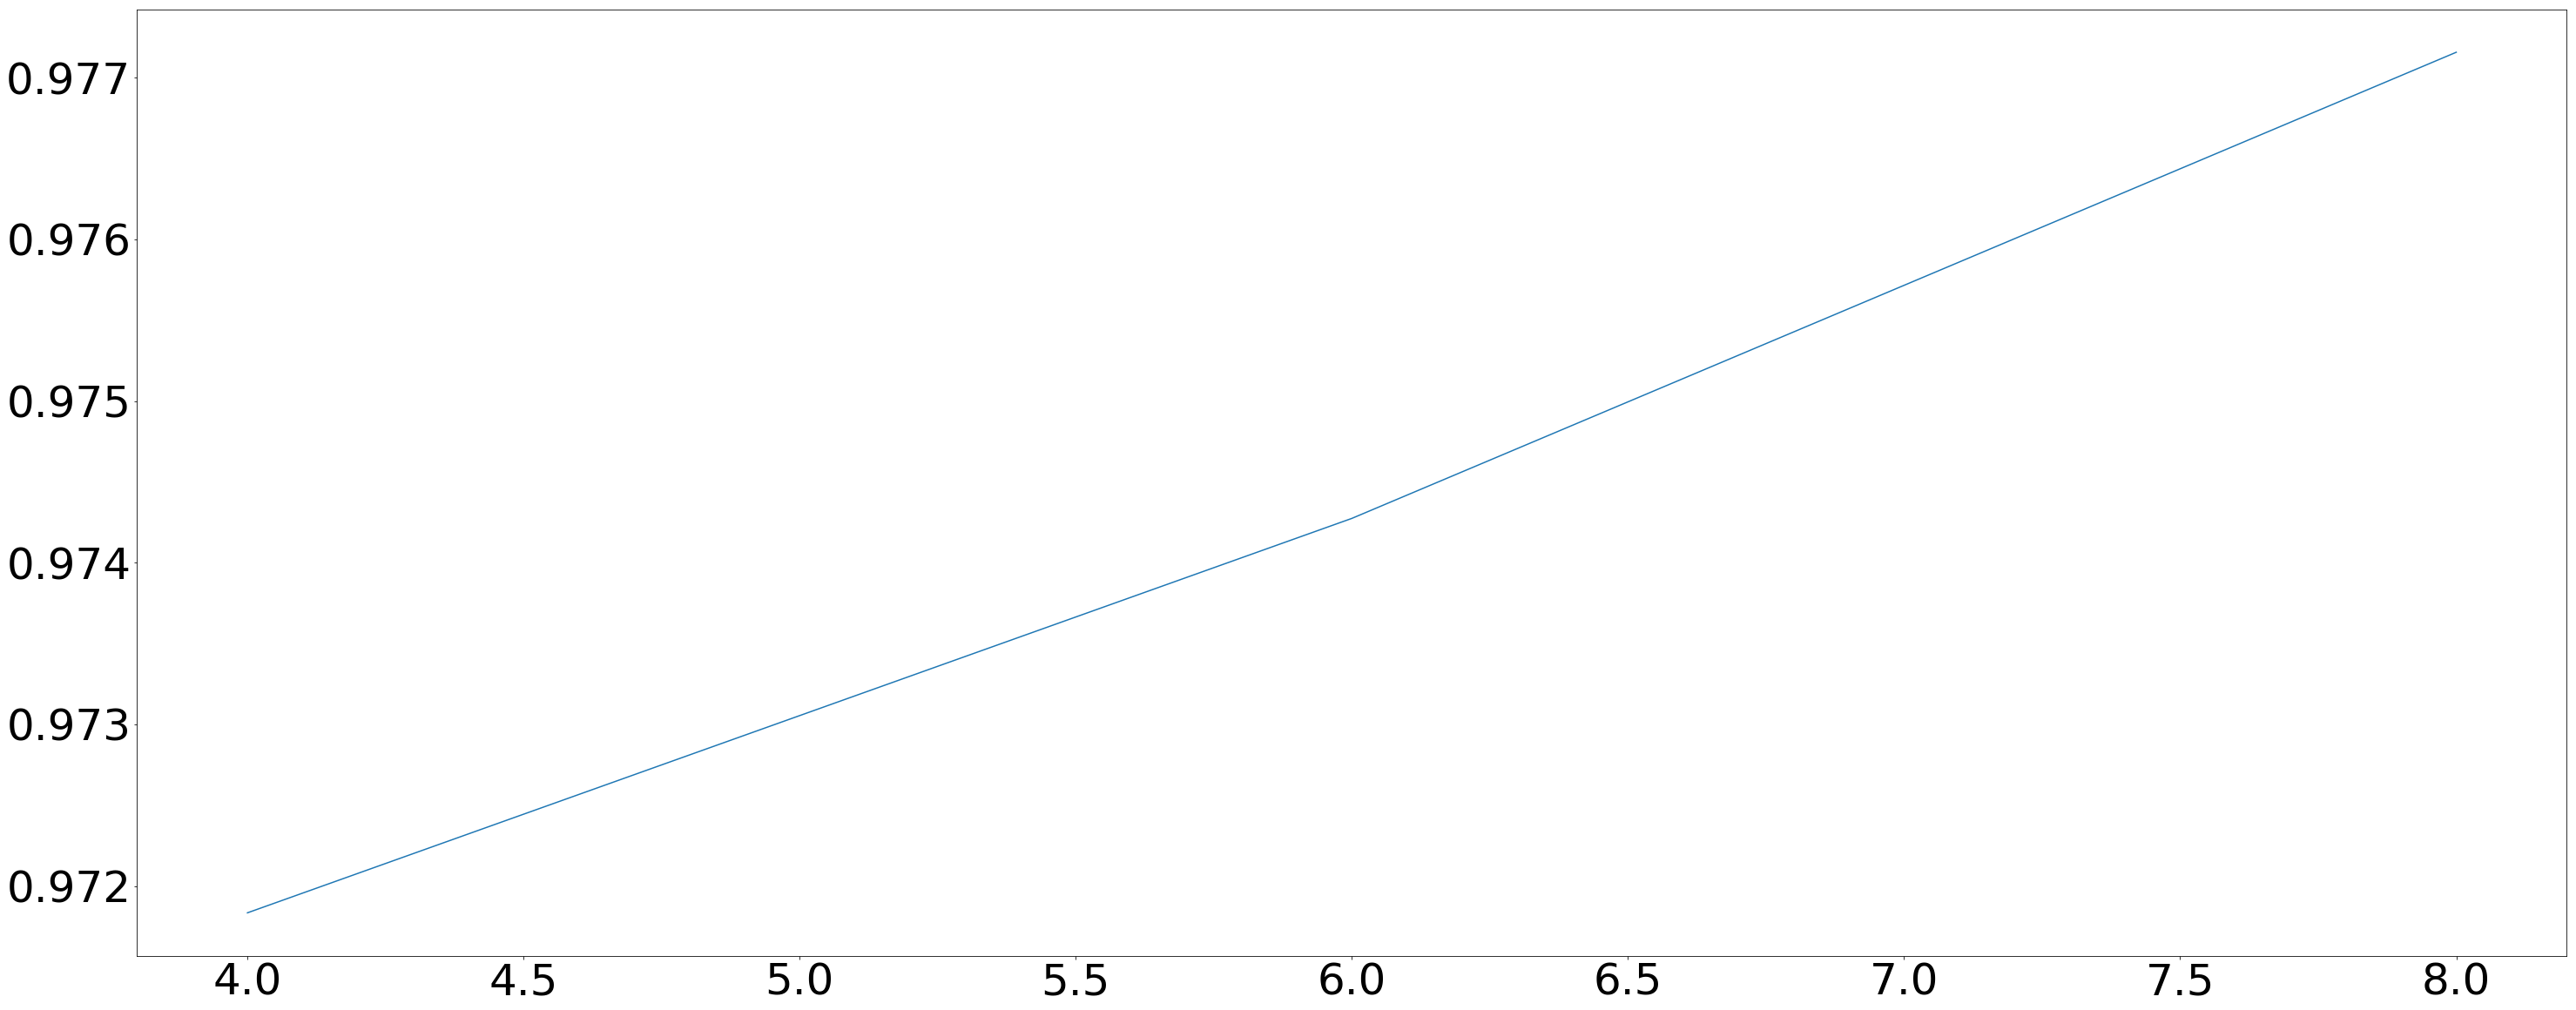

In [76]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP2=[]
for item in max_depth1:
    model2 = GradientBoostingClassifier(max_depth=item)
    model2.fit(x_train,y_train)
    ACP2.append(model2.score(x_test,y_test))
    print(item)
plt.plot(max_depth1,ACP2)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


150


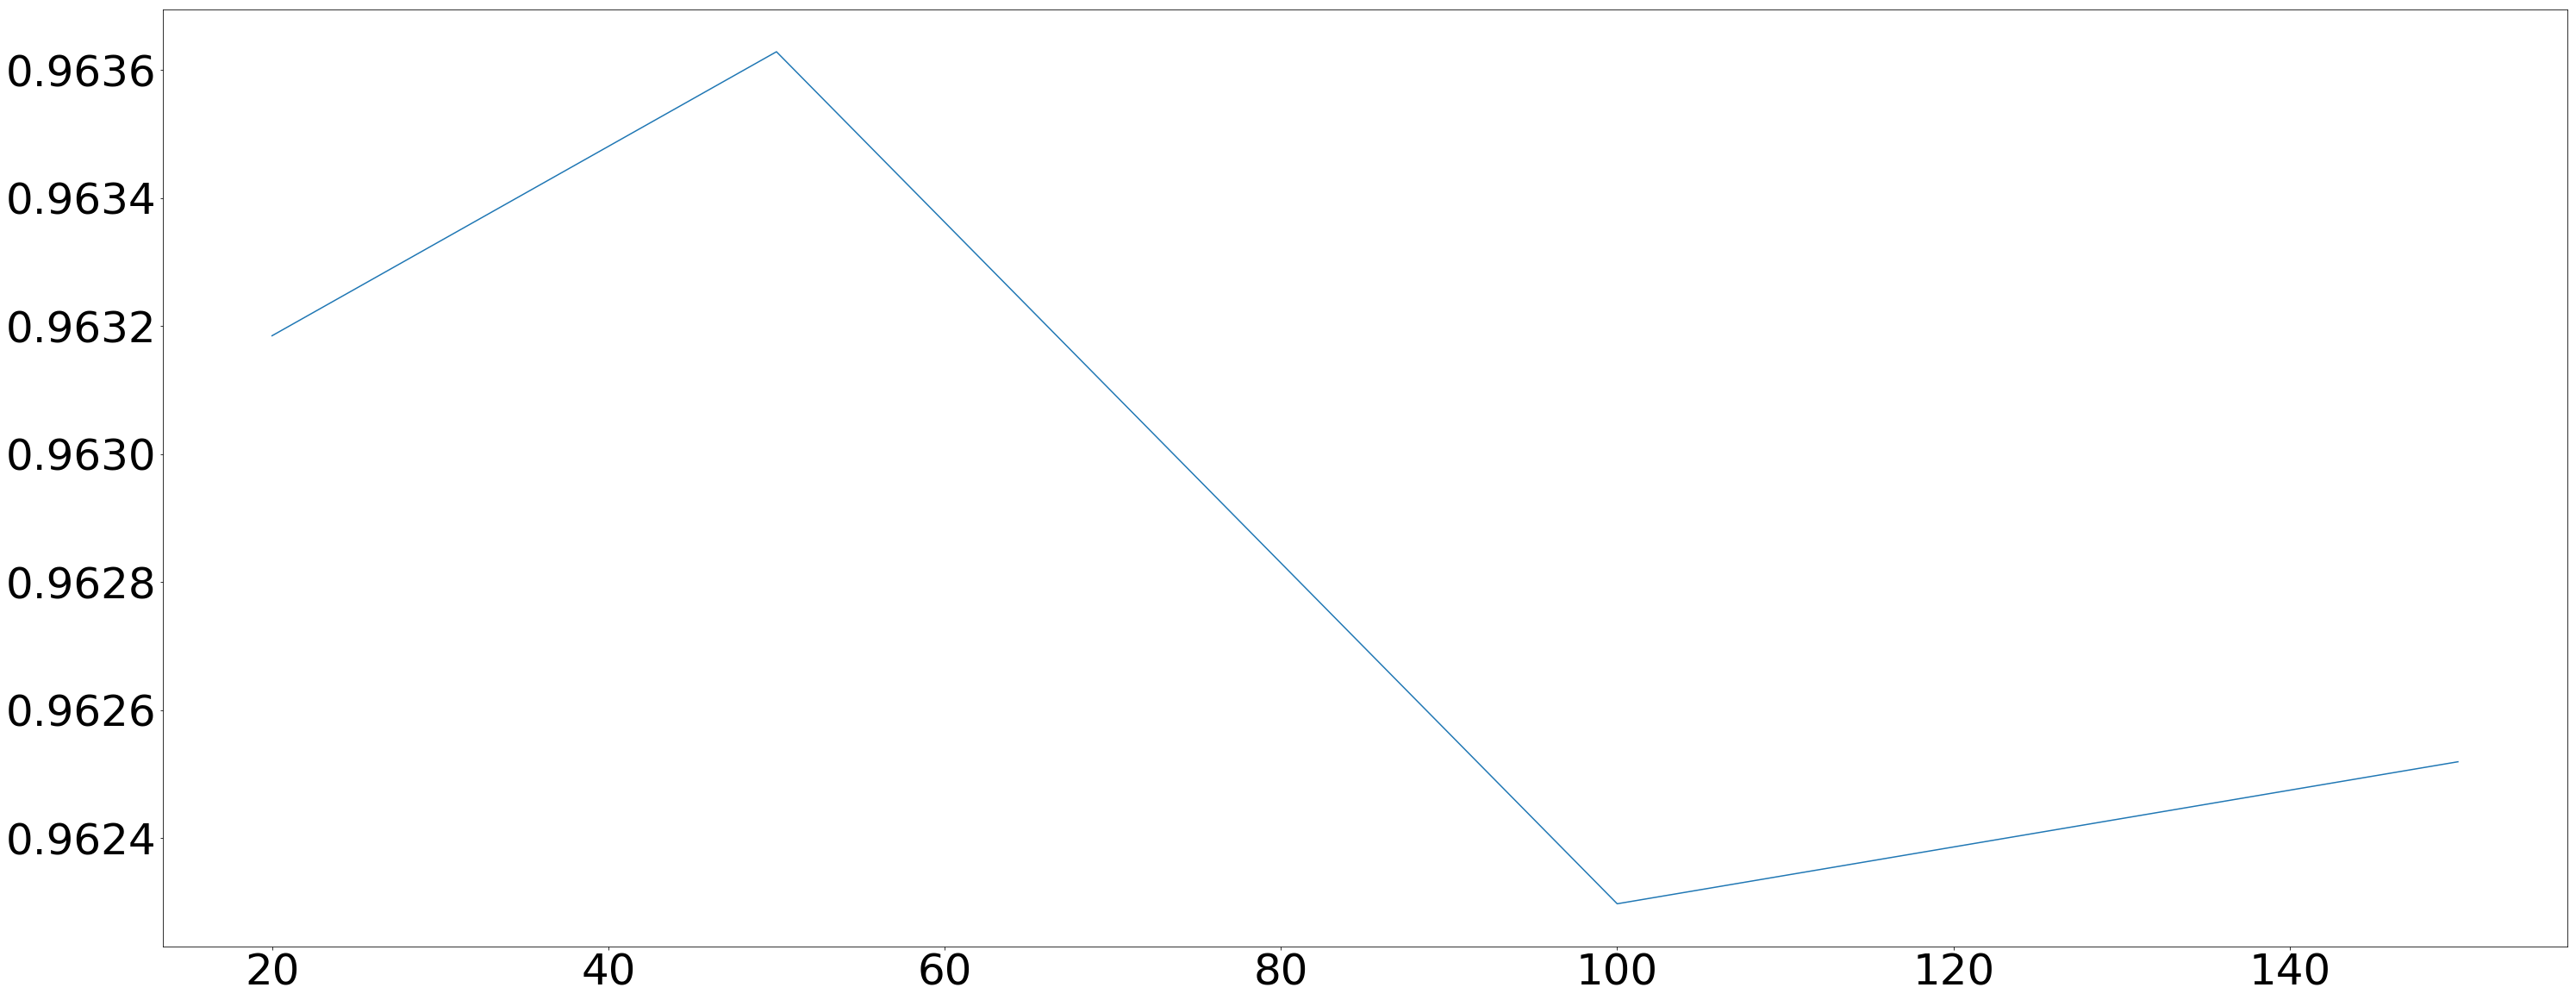

In [77]:
learning_rate1= [0.1, 0.05, 0.02, 0.01]
max_depth1= [4, 6, 8]
min_samples_leaf1= [20, 50,100,150]

ACP3=[]
for item in min_samples_leaf1:
    model3 = GradientBoostingClassifier(min_samples_leaf=item)
    model3.fit(x_train,y_train)
    ACP3.append(model3.score(x_test,y_test))
    print(item)
plt.plot(min_samples_leaf1,ACP3)

In [78]:
print (gb_final)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [79]:
# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)
dtc = DecisionTreeClassifier()
# instantiate the grid
grid5 = GridSearchCV(dtc, param_grid, cv=10,n_jobs=-1,verbose=2, scoring='accuracy')

# fit the grid with data
grid5.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   13.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14,

[[2534   58]
 [  61 1856]]
Precision score 0.9696969696969697
Recall score 0.9681794470526864
F1 score 0.9689376141999477


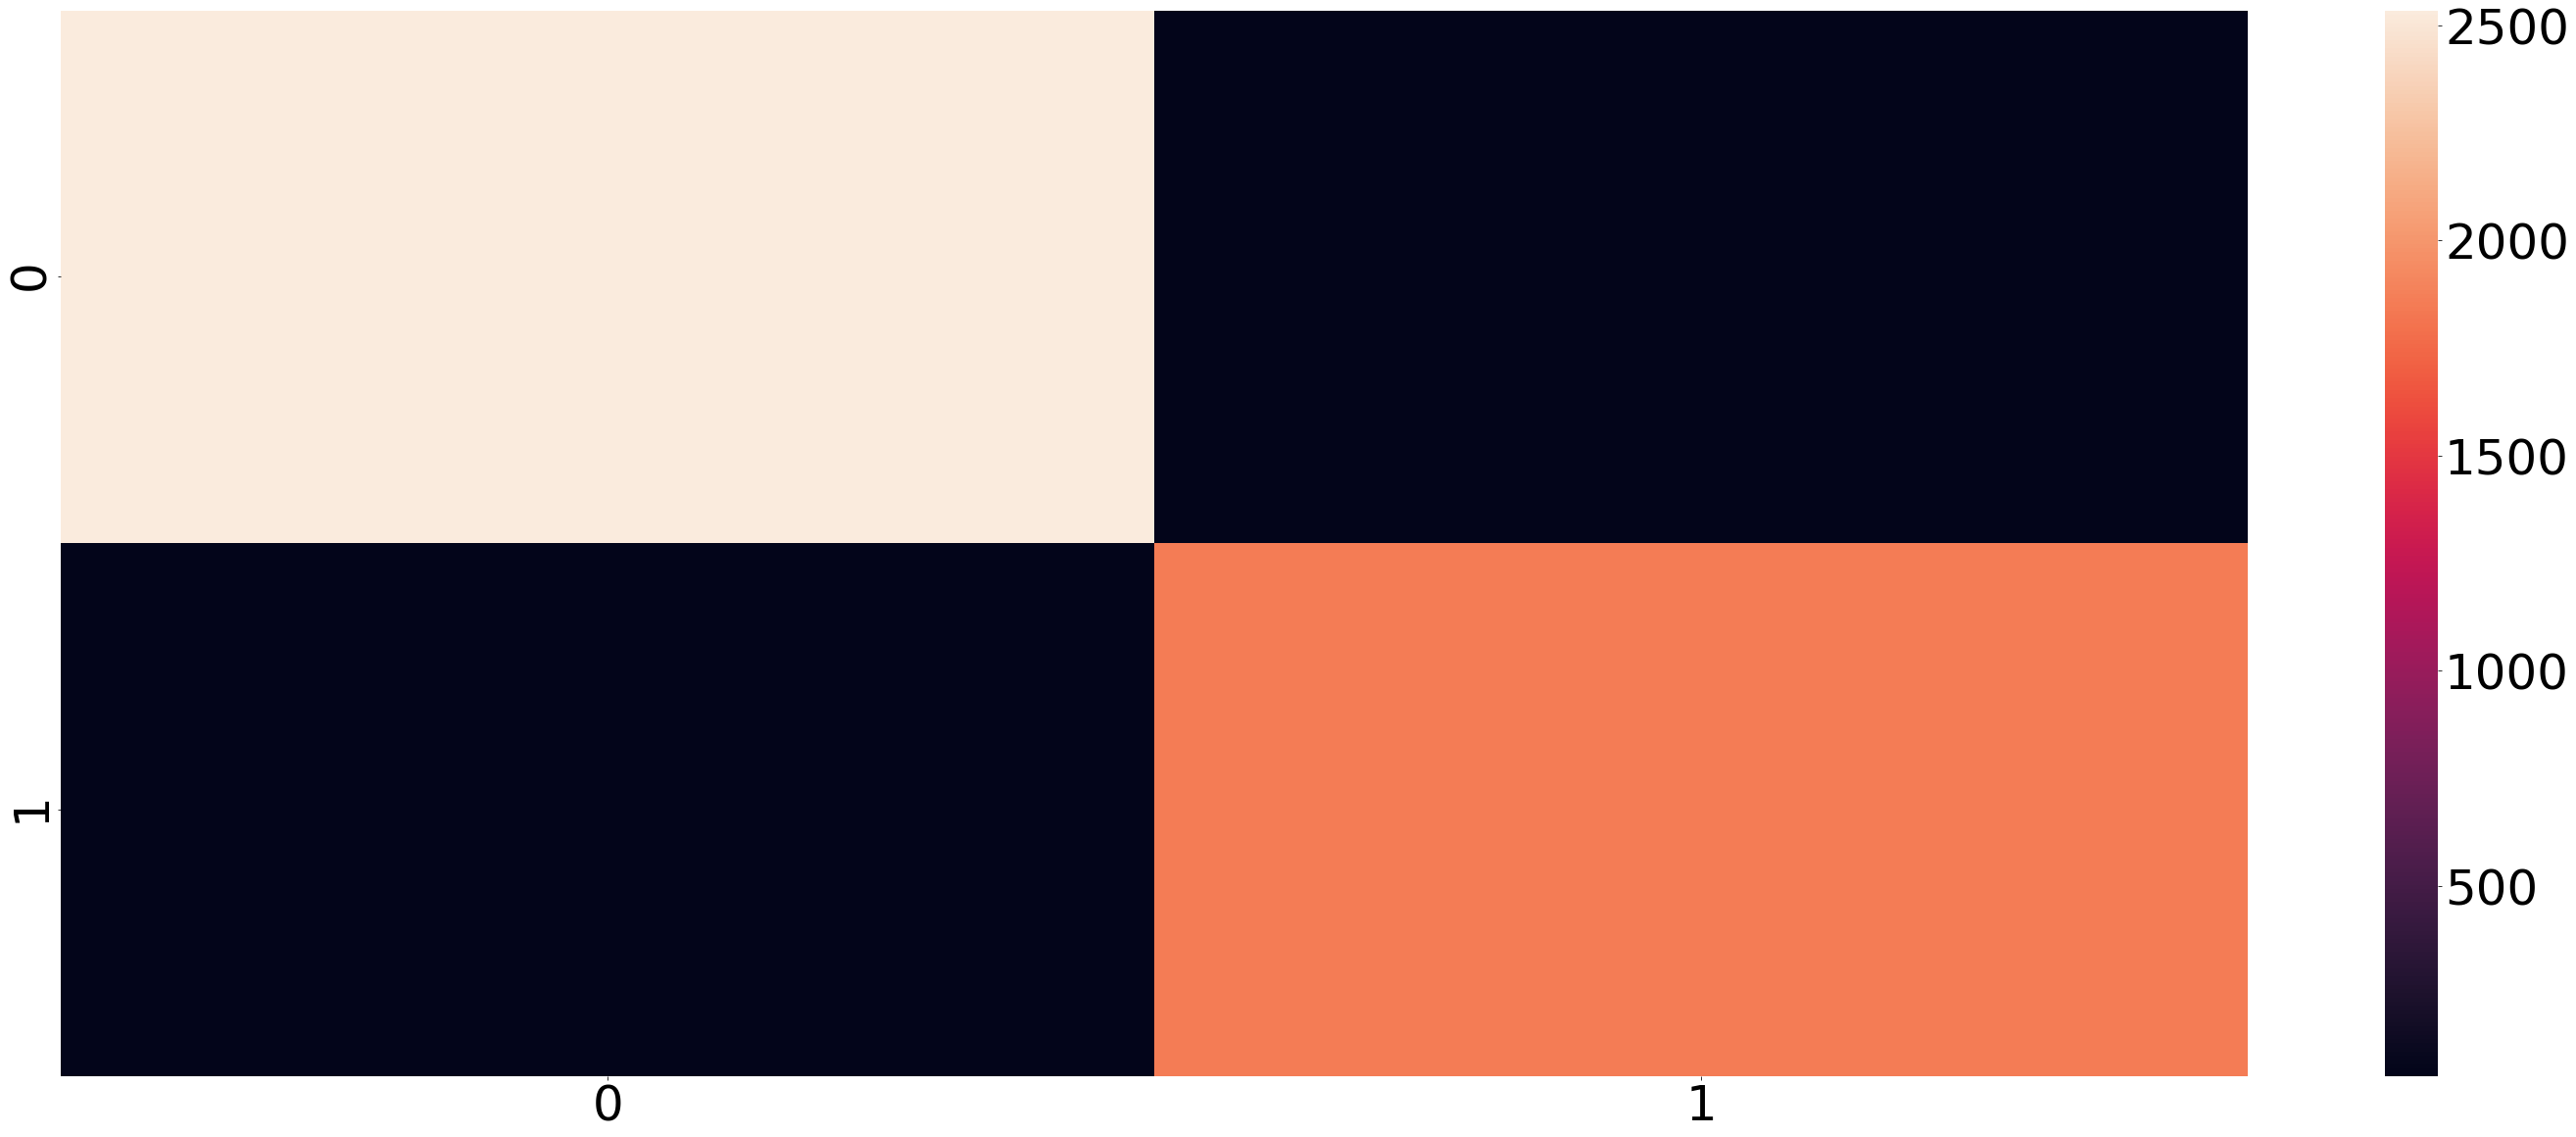

In [80]:
dt_final = grid5.best_estimator_
dt_final.fit(x_train,y_train)
pr1 = dt_final.predict(x_test)
confusion_matrix1 =confusion_matrix(y_test,pr1)
print (confusion_matrix1)
sns.heatmap(confusion_matrix1)
print ("Precision score "+str(precision_score(y_test,pr1)))
print ("Recall score "+str(recall_score(y_test,pr1)))
print ("F1 score "+str(f1_score(y_test,pr1)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


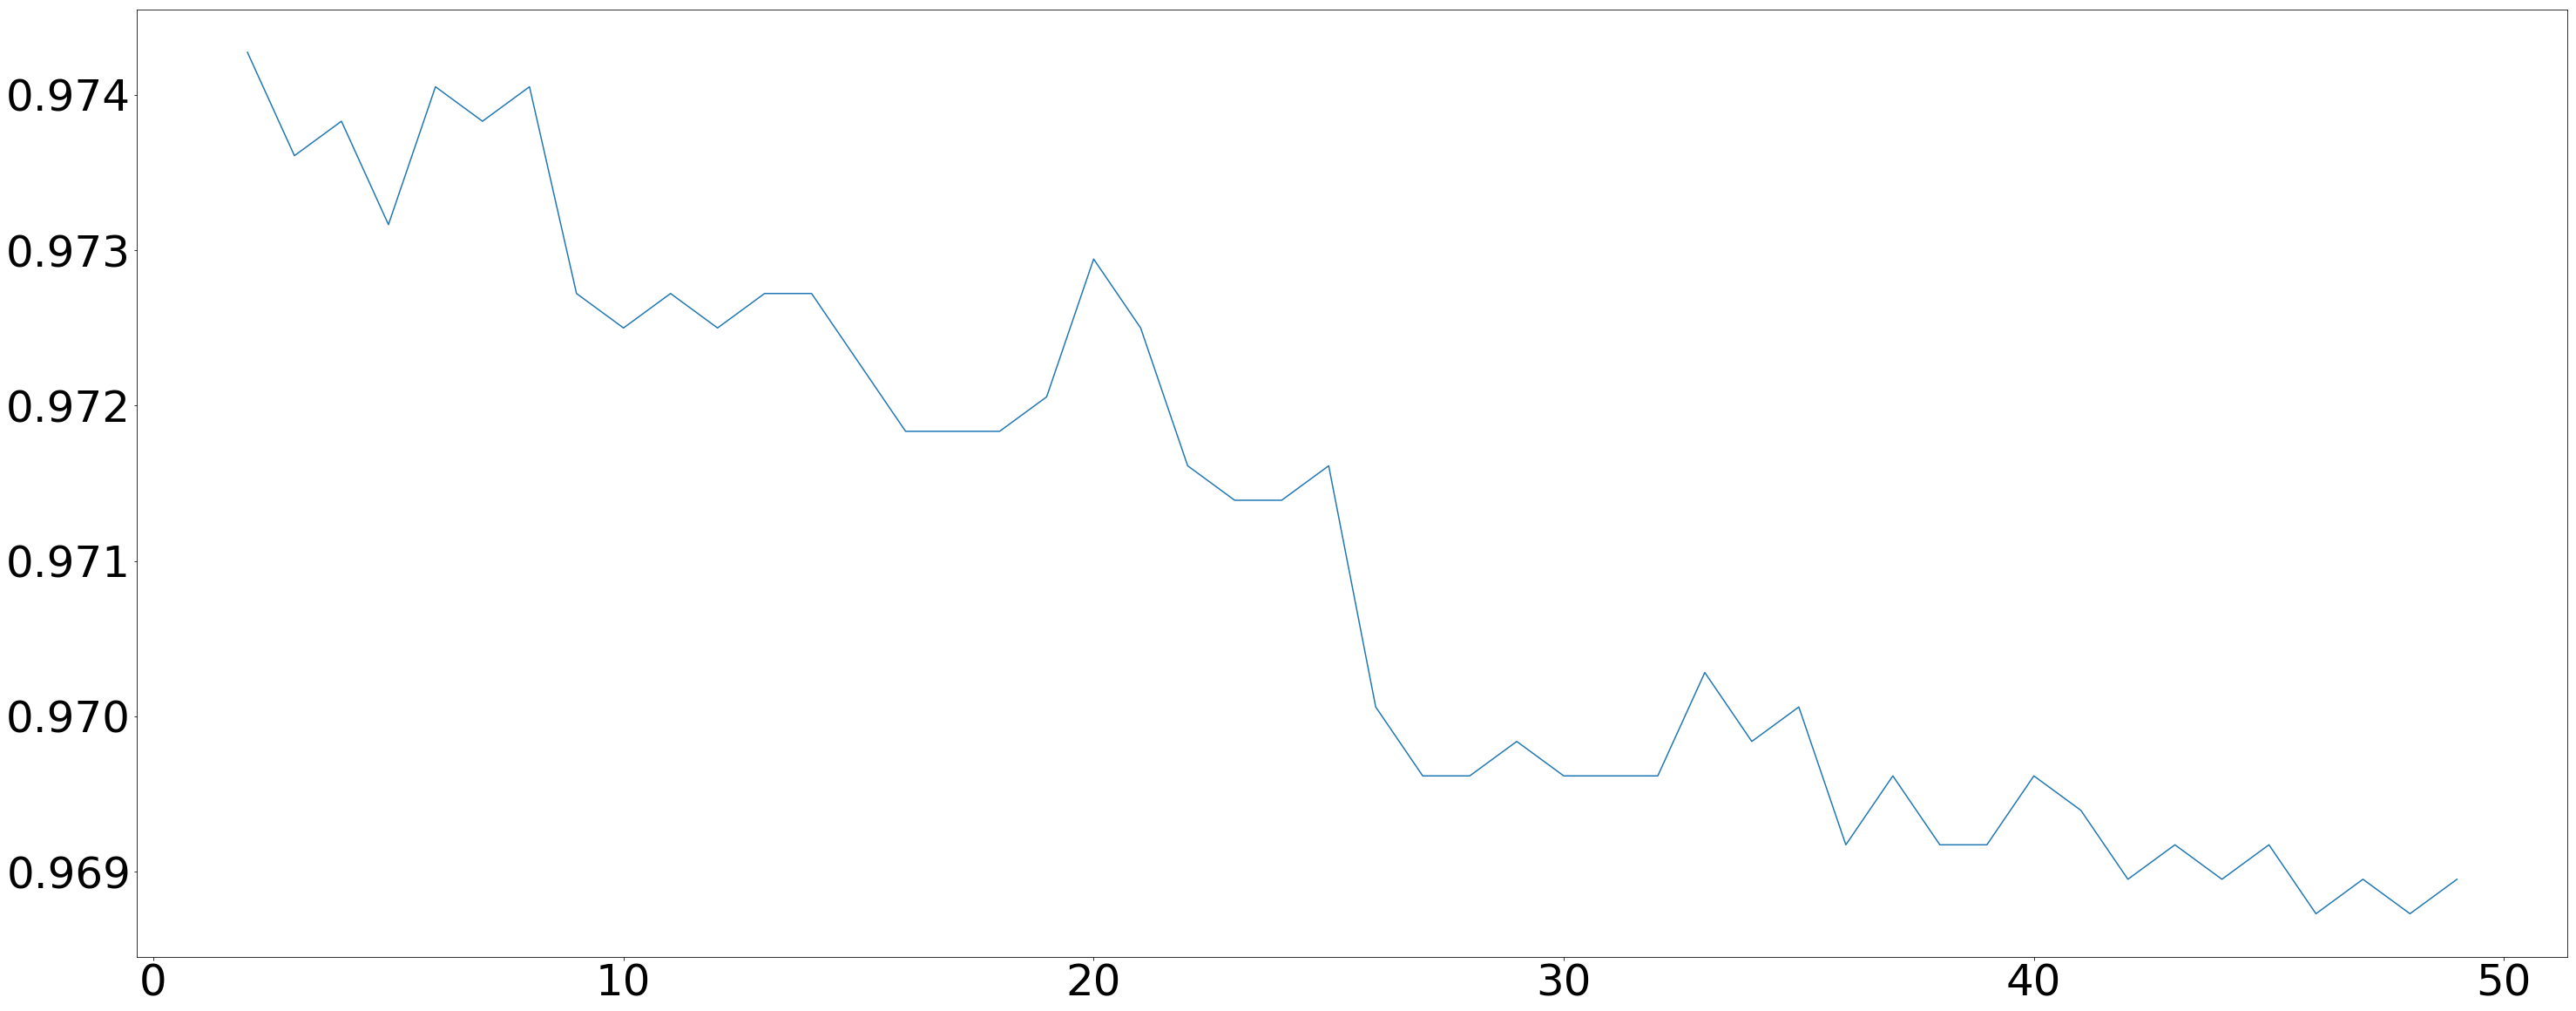

In [81]:
min_sample_split1=list(range(2, 50))

ACP4=[]
for item in min_sample_split1:
    model4 = DecisionTreeClassifier(min_samples_split=item)
    model4.fit(x_train,y_train)
    ACP4.append(model4.score(x_test,y_test))
    print(item)
plt.plot(min_sample_split1,ACP4)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
ML=[]
M=['DecisionTreeClassifier','KNeighborsRegressor','SVC','LinearSVC','RandomForestRegressor','GradientBoostingClassifier']
Z=[gb_final,knn_final,svc_final,lsvc_final,rf_final,gb_final]
##new
#M=['DecisionTreeClassifier','KNeighborsRegressor','SVC']
#Z=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [83]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

##new
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier# Using pipeline for applying logistic regression and one vs rest classifier
from sklearn.multioutput import MultiOutputClassifier
for model in Z:
    
    ##new
    models=MultiOutputClassifier(model)
    ##new
    models.fit(x_train1,y_train1)      ## training the model this could take a little time
    accuracy=models.score(x_test1,y_test1)    ## comparing result with the test data set
    ML.append(accuracy) 


(18035, 17)
(18035, 1)
(4509, 17)
(4509, 1)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

In [84]:
ML

[0.9691727655799512,
 0.9583056110002218,
 0.9385673098247949,
 0.6174318030605456,
 0.9656243069416722,
 0.9691727655799512]

In [85]:
d={'Accuracy':ML,'Algorithm':M}
df1=pd.DataFrame(d)

In [86]:
df1

,Accuracy,Algorithm
0,0.969173,DecisionTreeClassifier
1,0.958306,KNeighborsRegressor
2,0.938567,SVC
3,0.617432,LinearSVC
4,0.965624,RandomForestRegressor
5,0.969173,GradientBoostingClassifier


## LinearSVC failrd to predict cause its genarelly used for linearly genarated data ommiting this
## making combined classifier but ommiting the LSVC
## combined will use hard voting for selection

In [87]:
from sklearn.ensemble import VotingClassifier
voting_clf = MultiOutputClassifier(VotingClassifier(estimators=[('knn',knn_final),('rf',rf_final),('dt',dt_final),('svc',svc_final),('gb',gb_final)],voting='hard'))

In [88]:
voting_clf.fit(x_train1,y_train1)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MultiOutputClassifier(estimator=VotingClassifier(estimators=[('knn',
                                                              KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=4,
                                                                                   p=2,
                                                                                   weights='distance')),
                                                             ('rf',
                                                              RandomFore

In [89]:
predicted=voting_clf.predict(x_test1)

In [90]:
print (predicted)
#tmp_pred = gb_final.fit(x_train,y_train)
#pr1 = tmp_pred.predict(x_test)


[[1 1]
 [1 1]
 [0 1]
 ...
 [0 1]
 [1 2]
 [0 1]]


In [91]:
cf1_d=[]
cf2_d=[]
for item in predicted:
    cf1_d.append(item[0])
for item in predicted:
    cf2_d.append(item[1])
    


In [92]:
y_test1

,num_class,num_proto
11572,1,1
20380,1,1
5406,0,2
11146,0,1
4701,1,1
16552,0,1
5585,0,1
17074,1,1
13448,0,2
14429,0,1


In [93]:
voting_hybrid_classifier=voting_clf.score(x_test1,y_test1)

[[2505   39]
 [  61 1904]]
Precision score 0.979927946474524
Recall score 0.9689567430025445
F1 score 0.9744114636642786


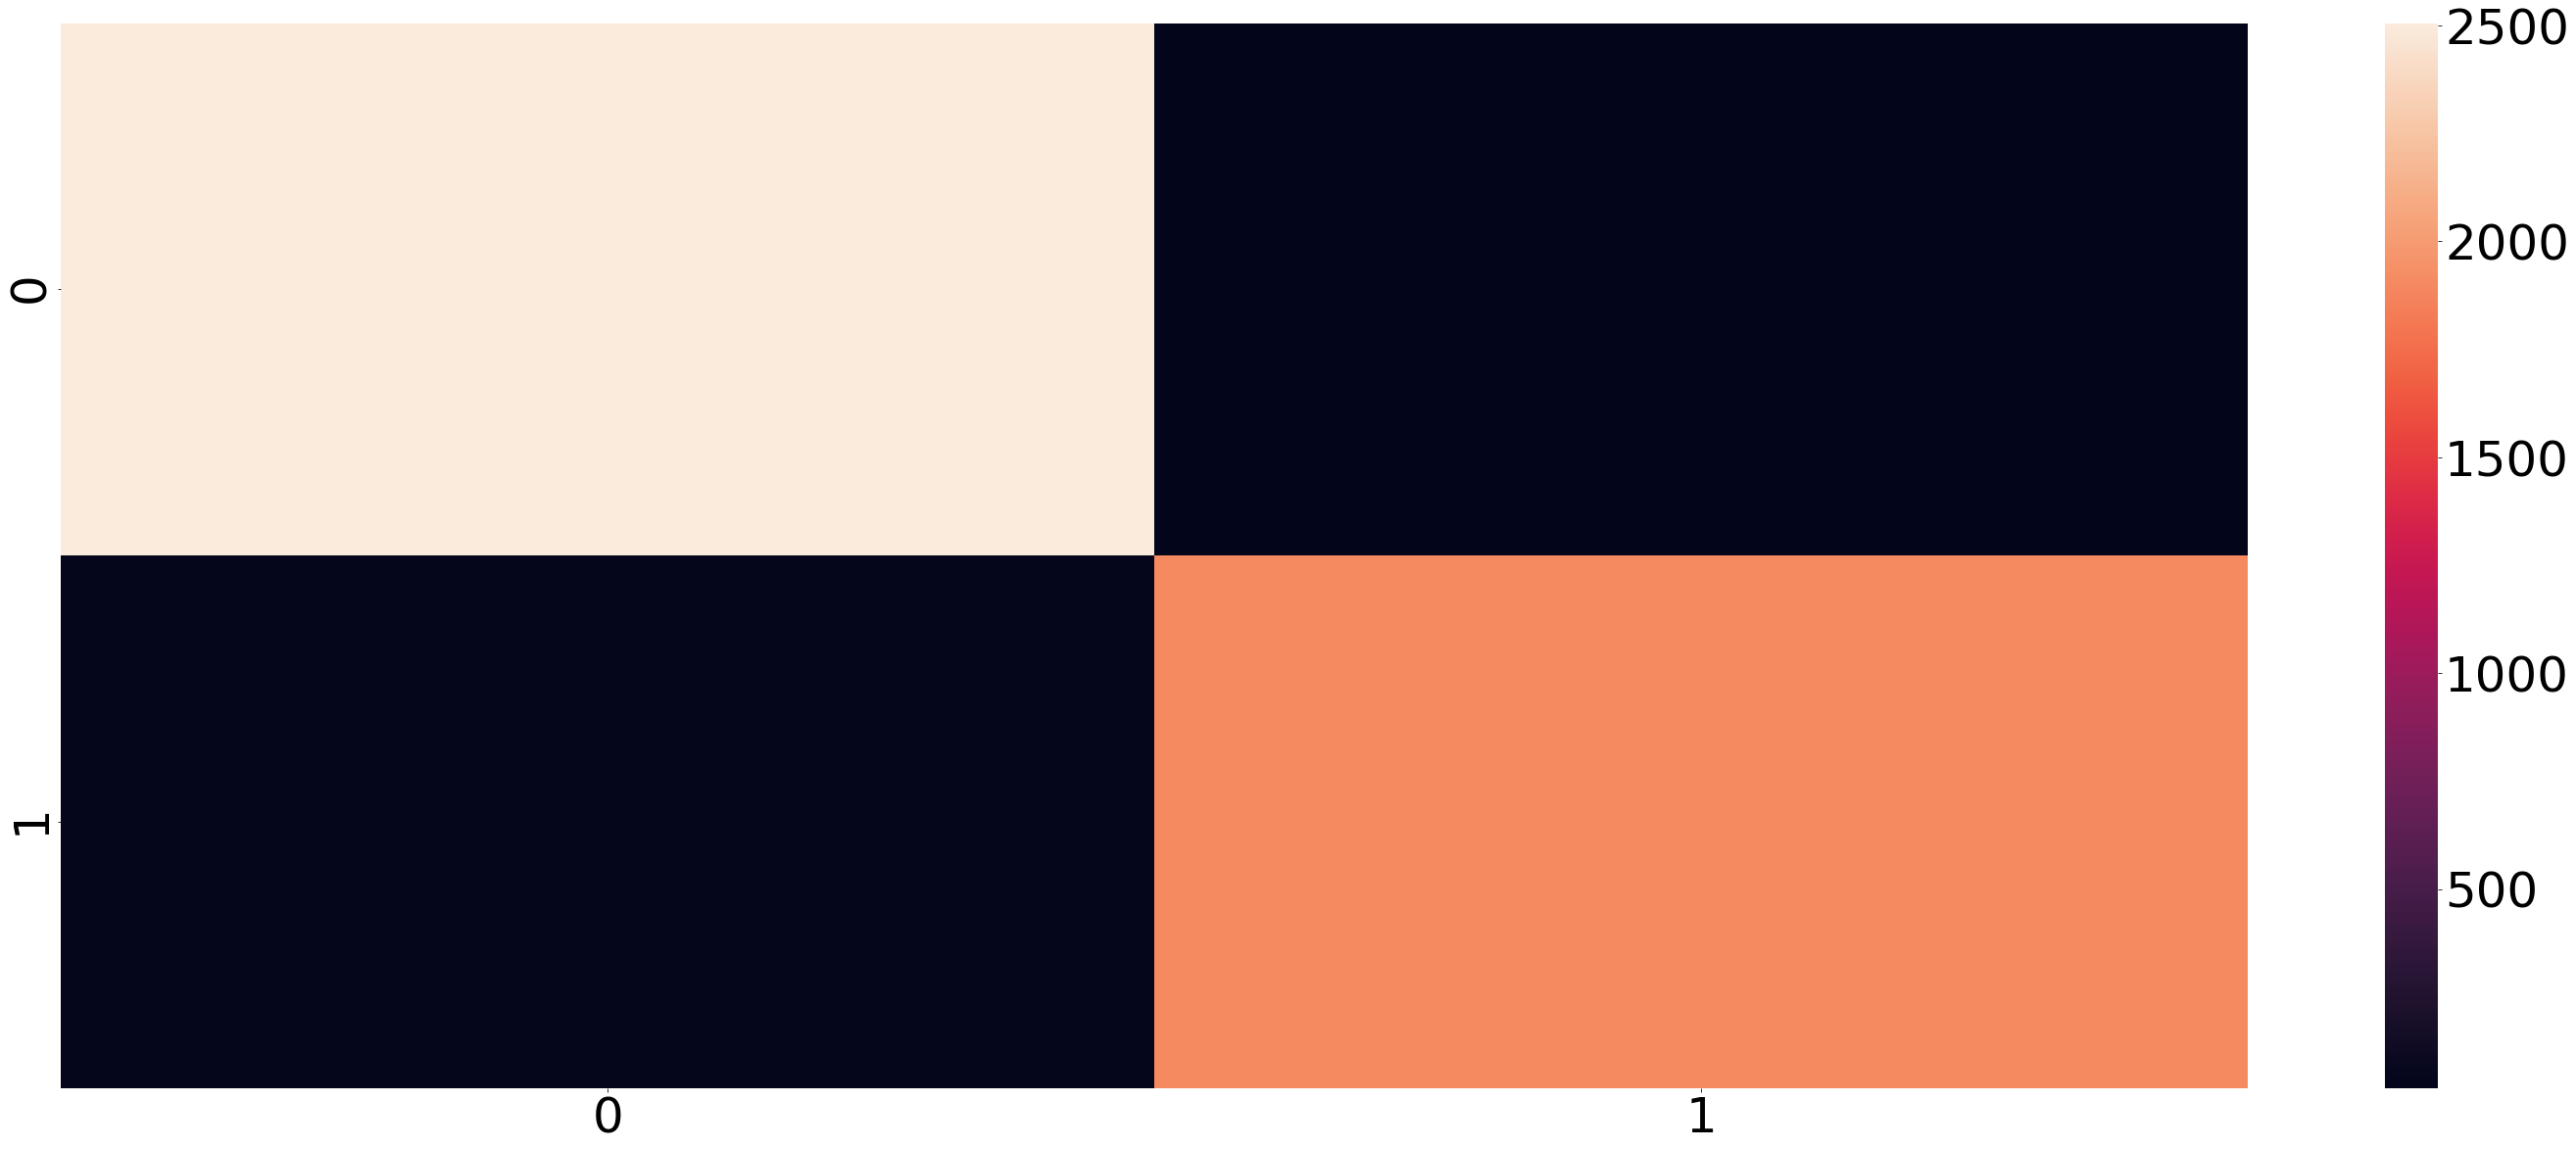

In [94]:

confusion_matrix1 =confusion_matrix(np.array(y_test1['num_class']),np.array(cf1_d))
#confusion_matrix2 =confusion_matrix(y_test,pr1)

print (confusion_matrix1)
print ("Precision score "+str(precision_score(np.array(y_test1['num_class']),np.array(cf1_d))))
print ("Recall score "+str(recall_score(np.array(y_test1['num_class']),np.array(cf1_d))))
print ("F1 score "+str(f1_score(np.array(y_test1['num_class']),np.array(cf1_d))))
#print (confusion_matrix2)

sns.heatmap(confusion_matrix1)

[[ 187   28    6]
 [   1 3789    3]
 [   5   25  465]]
Precision score 0.9849190507873142
Recall score 0.9849190507873142
F1 score 0.9849190507873142


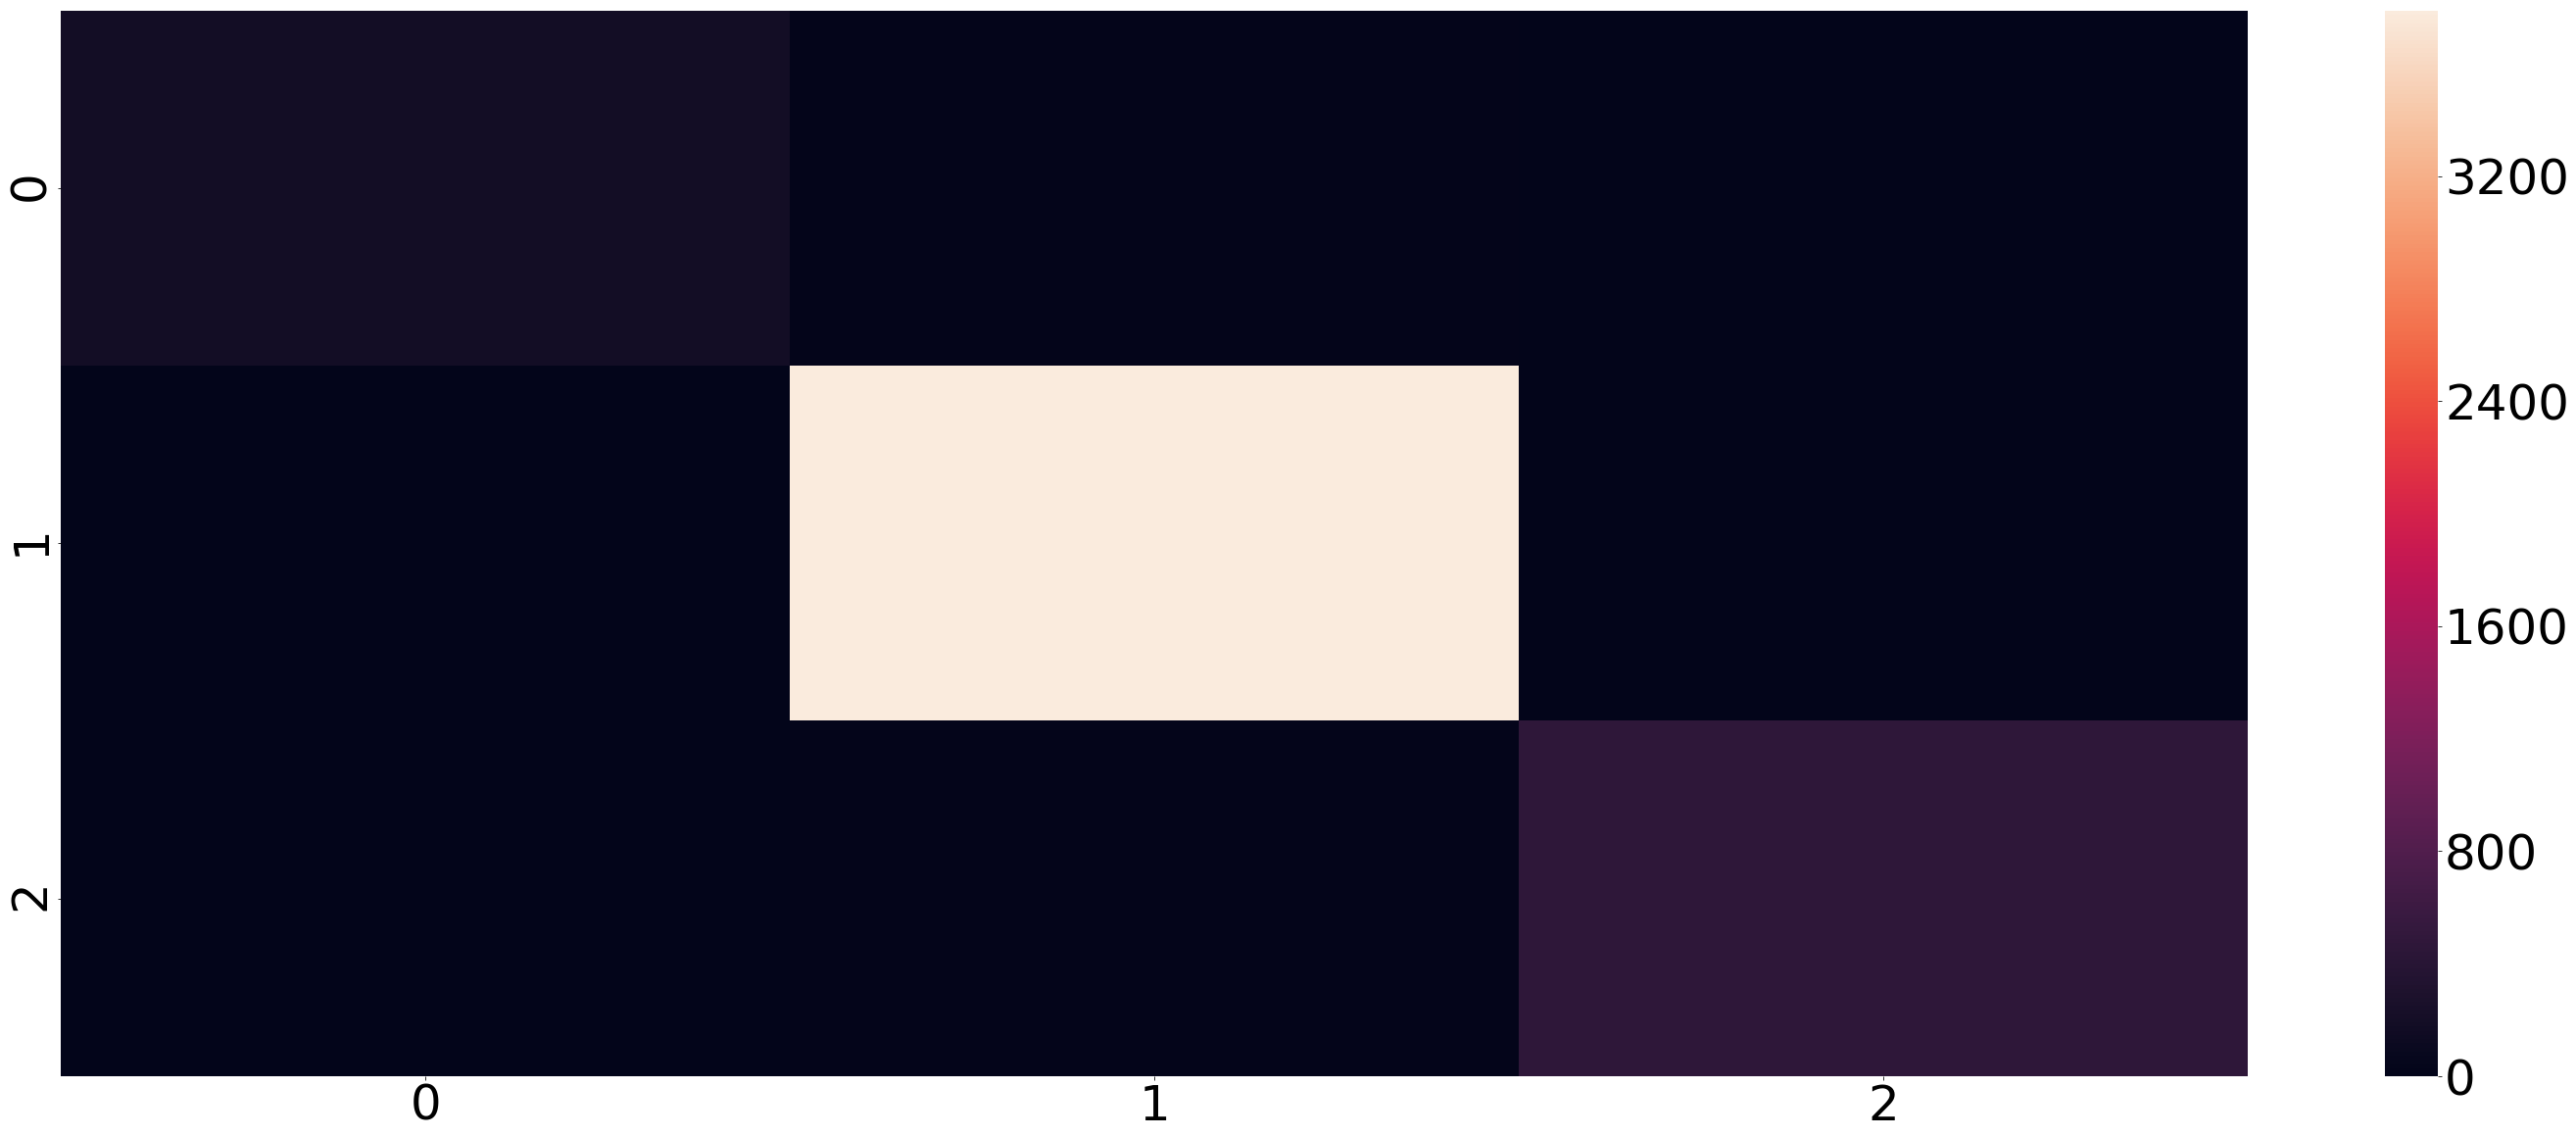

In [95]:
confusion_matrix2 =confusion_matrix(np.array(y_test1['num_proto']),np.array(cf2_d))
#confusion_matrix2 =confusion_matrix(y_test,pr1)

print (confusion_matrix2)
print ("Precision score "+str(precision_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
print ("Recall score "+str(recall_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
print ("F1 score "+str(f1_score(np.array(y_test1['num_proto']),np.array(cf2_d),average='micro')))
#print (confusion_matrix2)

sns.heatmap(confusion_matrix2)

# Primary validation shows 97.6 % accuracy

In [96]:
## mse
from sklearn.metrics import mean_squared_error

In [97]:
mse = mean_squared_error(y_test1,predicted)

In [98]:
mse

0.022288755821689953

# going for cross val comparison for more accurate evaluation

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
print(cross_val_score(voting_clf, x_test1, y_test1, cv=3))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.95608782 0.95209581 0.96074518]


## 3 for split we get more than 95 % accuracy so we dont have overfitting problem

# going for 10 split

In [101]:
print(cross_val_score(voting_clf, x_test1, y_test1, cv=10))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.96674058 0.9556541  0.96674058 0.96452328 0.96008869 0.96895787
 0.95121951 0.97339246 0.96008869 0.93777778]


##  for 10 split we get more than 94 % accuracy so we definitly  dont have overfitting problem

In [102]:
voting_hybrid_classifier

0.9667332002661344

In [103]:
#df1=df1.drop('hybrid_voting_Classifier',axis=1)

In [104]:
ML.append(voting_hybrid_classifier)

In [105]:
M=['DecisionTreeClassifier','KNeighborsRegressor','SVC','LinearSVC','RandomForestRegressor','GradientBoostingClassifier','hybrid_voting_classifier']
d={'Accuracy':ML,'Algorithm':M}
df1=pd.DataFrame(d)

In [106]:
df1

,Accuracy,Algorithm
0,0.969173,DecisionTreeClassifier
1,0.958306,KNeighborsRegressor
2,0.938567,SVC
3,0.617432,LinearSVC
4,0.965624,RandomForestRegressor
5,0.969173,GradientBoostingClassifier
6,0.966733,hybrid_voting_classifier


<BarContainer object of 7 artists>

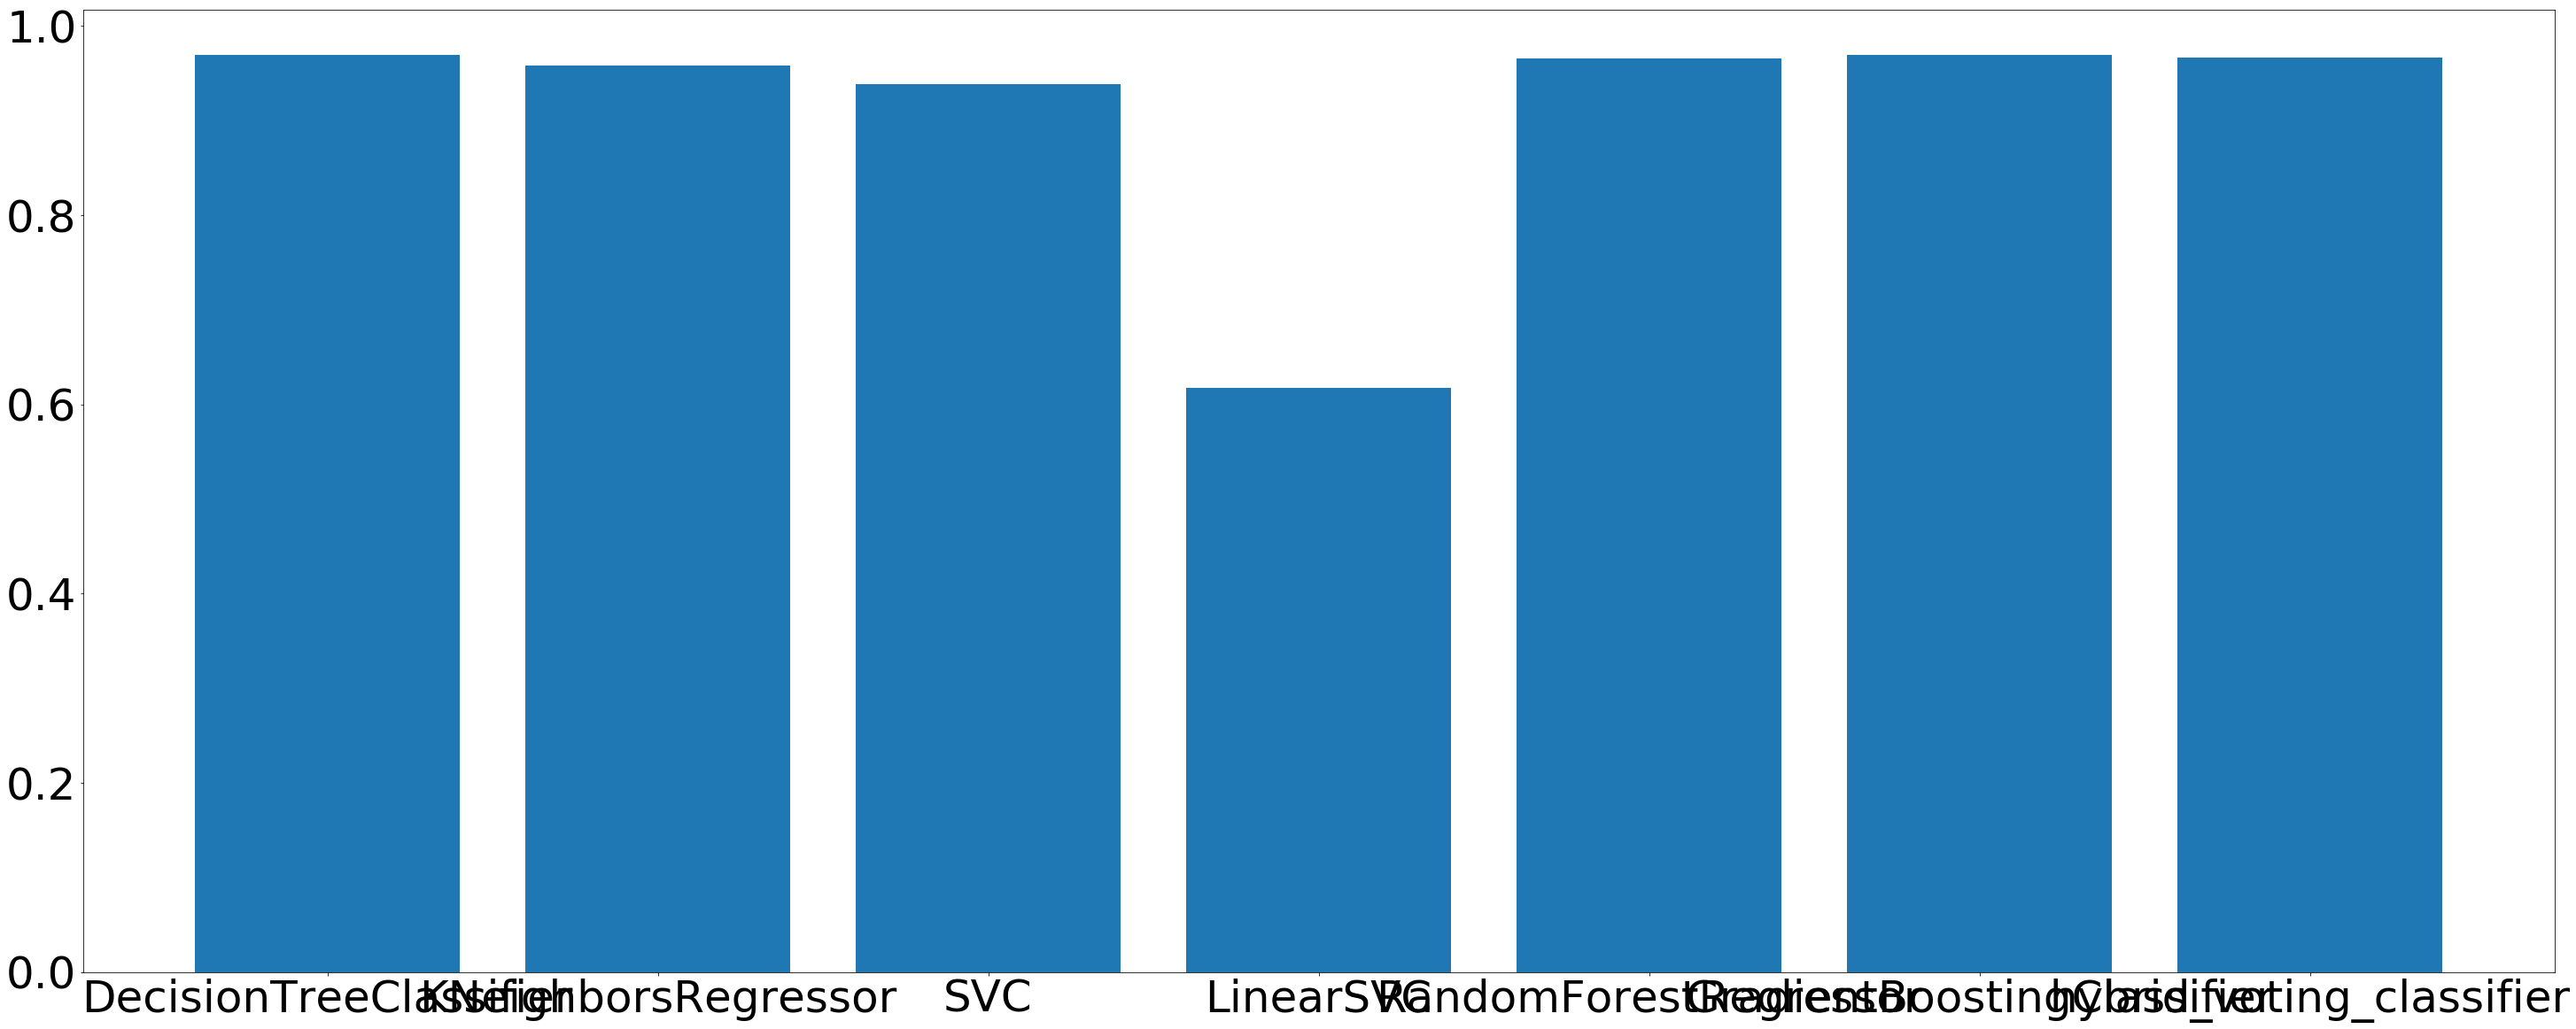

In [107]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.bar(df1['Algorithm'],df1['Accuracy'])

## combined classifier shows the best accuracy without any overfitting problem